# Descripción del Proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

El dataset presenta infromación sobre ventas, scores y rating de videojuegos que ha comercializado la empresa hasta 2016. Cuenta con 11 columnas descritas a continuación:

- Name: Nombre oficial del videojuego.
- Platform: Consola en la que salió el videojuego.
- Year_of_Release: Año de lanzamiento del videojuego al mercado.
- Genre: Género del videojuego.
- NA_sales: Ventas en Norteamérica en millones de dólares estadounidenses.
- EU_sales: Ventas en Europa en millones de dólares estadounidenses.
- JP_sales: Ventas en Japón en millones de dólares estadounidenses.
- Other_sales: Ventas en otros países en millones de dólares estadounidenses.
- Critic_Score: Calificación promedio entre 0 y 100 dada por la crítica especializada.
- User_Score: Calificación promedio entre 0 y 10 dada por los jugadodores.
- Rating: Clasificación de contenido recomendado por la ESRB.

Nota. Es posible que los datos de 2016 estén incompletos.

## Paso 1. Entendimiento de los datos
Abrir el archivo de datos y estudiar la información general (/datasets/games.csv):

In [1]:
# Cargar librerías
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos
df_videogames = pd.read_csv("/datasets/games.csv")

In [3]:
df_videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Visualización de DataFrame
df_videogames.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16657,Dramatical Murder Re:code,PSV,2014.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
2335,Lego Batman 3: Beyond Gotham,X360,2014.0,Action,0.48,0.33,0.00,0.08,NaN,6.8,E10+
3548,Up,Wii,2009.0,Action,0.22,0.28,0.00,0.06,62.0,8,E10+
6836,Sakura Wars: Atsuki Chishio Ni,PS2,2003.0,Role-Playing,0.00,0.00,0.24,0.00,NaN,NaN,NaN
414,True Crime: Streets of LA,PS2,2003.0,Action,1.89,1.05,0.02,0.31,77.0,8,M


In [5]:
# Visualización de las plataformas que tenemos en el DataFrame y su conteo
df_videogames["Platform"].value_counts().sort_index()

2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: Platform, dtype: int64

In [6]:
# Visualización de los géneros que tenemos en el DataFrame y su conteo
df_videogames["Genre"].value_counts().sort_index()

Action          3369
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1498
Shooter         1323
Simulation       873
Sports          2348
Strategy         683
Name: Genre, dtype: int64

In [7]:
# Visualización de la información estadística de las ventas de los videojuegos por lugar
df_videogames[["NA_sales", "EU_sales", "JP_sales", "Other_sales"]].describe().round(2)

,NA_sales,EU_sales,JP_sales,Other_sales
count,16715.00,16715.00,16715.00,16715.00
mean,0.26,0.15,0.08,0.05
std,0.81,0.50,0.31,0.19
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.08,0.02,0.00,0.01
75%,0.24,0.11,0.04,0.03
max,41.36,28.96,10.22,10.57


In [8]:
# Visualización de la información estadística de los scores de los críticos como de los usuarios
df_videogames[["Critic_Score", "User_Score"]].describe().round(2)

,Critic_Score
count,8137.00
mean,68.97
std,13.94
min,13.00
25%,60.00
50%,71.00
75%,79.00
max,98.00


In [9]:
# Visualización de los valores en la columna user_score para revisar a qué se debe el tipo de datos "objet" por lo que no funcionó el describe() realizado 
df_videogames["User_Score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
# Visualización de los raiting que tenemos y su conteo
df_videogames["Rating"].value_counts().sort_index()

AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: Rating, dtype: int64

In [11]:
# Verificar filas totalmente duplicadas en el DataFrame
df_videogames.duplicated().sum()

0

In [12]:
# Verificar si hay duplicados, y su cantidad, en el conjunto que no debería repetirse, para ello utilizamos subset con sum()
df_videogames.duplicated(subset = ["Name", "Platform", "Year_of_Release", "Genre"]).sum()

2

In [13]:
# Visualización de los duplicados encontrados en "Name", "Platform", "Year_of_Release" y "Genre"
df_videogames[df_videogames[ ["Name", "Platform", "Year_of_Release", "Genre"]].duplicated()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


##### Observaciones y Plan de Acción

- Se observó que los nombre de las columnas no cumplen con el formato snake_case, por lo que se cambiarán a minúsculas.

- Para las columnas "Name", "Genre" y "Year_of_realese" se observa una cantidad muy pequeña de valores perdidos: 2 filas(0.01%), 2 filas(0.01%) y 256 filas (1.6%) respectivamente. Por tal motivo se decidió eliminar las filas de los valores ausentes ya que no son significativos.

- La columna "User_Score" es de tipo object y se espera que sea de tipo numérico para poder realizar análisis más adelante, por lo que el valor “tbd” de la columna User_Score se reemplazará por un valor perdido numérico. Ya que se tenga la columna en tipo float se procederá a multiplicar por 10 cada valor para estandarizar las magnitudes con la columna de "Critic_Score" y facilitar comparaciones futuras.

- La columna "year_of_release" es de tipo flotante, se cambiará el formato a tipo numérico para una visualización más limpia en presentación de tablas.

- Se observa que hay valores ausentes en las columnas "Critic_Score" y "User_Score", esto podría deberse a que hay videojuesgos que aún no presentan alguna calificación o crítica y son datos de gran importancia por lo que reemplazarlos no es una opción. Por tal motivo se decide dejarlos tal cual están.

- La columna Raiting presenta abreviaciones que podrían ser díficles de interpretar, por lo que se decide cambiar las opciones existentes por otros valores que den una interpretación más semántica de los datos y faciliten así su interpretación durante el análisis. Por otro lado, en esta misma columna se reemplazarán los valores perdidos por pendientes de calificación pues esta tipología existe en ESRB y resulta coherente con el contexto.

- Se eliminarán los duplicados detectados en el DataFrame pues corresponden seguramente a errores de registro.

- Para enriquecer los datos se agruparán las opciones existentes de la columna Platform en tipologías de forma que se cree la columna platform_group (i.e Nintendo, Playstation, etc.). Lo anterior, ya que existen muchas opciones posibles y desbalanceadas lo cual puede dificultar la interpretacion de resultados posteriores.

- Asimismo, se generará una nueva columna total_sales que agregue las ventas a nivel mundial. Esto ya que al ser este indicador uno de los que se analizarán, conviene tener un valor agregado que evite códigos redundantes posteriormente.

## Paso 2. Preparación de los datos

In [14]:
# Cambiar los nombres de las columnas a snake_case con un blucle que itera sobre los encabezados y los pone en minúsculas
new_name_columns = []
for name in df_videogames.columns:
    name_lowered = name.lower()
    new_name_columns.append(name_lowered)

df_videogames.columns = new_name_columns
df_videogames.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [15]:
# Eliminar filas que contienen los valores perdidos en "name", "genre" y "year_of_release"
df_videogames = df_videogames.dropna(subset = ["name","genre", "year_of_release"])
df_videogames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [16]:
# Crear columna con grupos de plataformas a través de una función
def fun_plataforma (platform_name):
    if platform_name in ["3DS","DS","GB","GBA","GC","N64","NES","SNES","Wii","WiiU"]:
        return "Nintendo"
    elif platform_name in ["PC","PCFX"]:
        return "PC"
    elif platform_name in ["PS","PS2","PS3","PS4","PSP","PSV"]:
        return "PlayStation"
    elif platform_name in ["X360","XB","XOne"]:
        return "XBox"
    else:
        return "Other"

df_videogames["platform_group"] = df_videogames["platform"].apply(fun_plataforma)
df_videogames.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group
10692,Harvey Birdman: Attorney at Law,PSP,2008.0,Adventure,0.09,0.00,0.00,0.01,62.0,8,T,PlayStation
10780,Digimon World: Next Order,PSV,2016.0,Action,0.00,0.00,0.10,0.00,NaN,NaN,NaN,PlayStation
6660,Animal Paradise,DS,2007.0,Simulation,0.09,0.14,0.00,0.02,49.0,tbd,E,Nintendo
1771,Donkey Konga,GC,2003.0,Misc,0.50,0.16,0.46,0.03,76.0,8.3,E,Nintendo
12555,Star Soldier: Vanishing Earth,N64,1998.0,Shooter,0.05,0.01,0.00,0.00,NaN,NaN,NaN,Nintendo


In [17]:
# Visualización de los grupos de pataformas que tenemos y su conteo
df_videogames["platform_group"].value_counts()

PlayStation    6637
Nintendo       6169
XBox           2282
PC              958
Other           398
Name: platform_group, dtype: int64

In [18]:
# Sustituir las celdas con "tbd" por valor perdido numérico en user_score utilizando replace y np.nan
df_videogames["user_score"] = df_videogames["user_score"].replace("tbd", np.nan)
df_videogames["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [19]:
# Transformar "user_Score" de object a flotante y "year_of_release" de float a int
df_videogames["user_score"] = df_videogames["user_score"].astype(float)
df_videogames["year_of_release"] = df_videogames["year_of_release"].astype(int)
df_videogames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  platform_group   16444 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


In [20]:
# Multiplicar user_score x 10 para homologación de magnitudes con critic_score
df_videogames["user_score"] = df_videogames["user_score"] * 10
df_videogames[["critic_score","user_score"]].describe().round(2)

,critic_score,user_score
count,7983.00,7463.00
mean,68.99,71.26
std,13.92,14.99
min,13.00,0.00
25%,60.00,64.00
50%,71.00,75.00
75%,79.00,82.00
max,98.00,97.00


In [21]:
# Hacer los datos de la columna "rating" más entendibles sin abreviaciones
def fun_rating (rating):
    if rating == "E" or rating == "K-A":
        return "Everyone"
    elif rating == "T":
        return "Teens"
    elif rating == "M":
        return "Mature"
    elif rating == "E10+":
        return "Everyone from 10 year"
    elif rating == "EC":
        return "Early Childhood"
    elif rating == "RP":
        return "Pending"
    elif rating == "AO":
        return "Adults Only"
    else:
        return "Pending"

df_videogames["rating"] = df_videogames["rating"].apply(fun_rating)
df_videogames["rating"].value_counts()

Pending                  6677
Everyone                 3924
Teens                    2905
Mature                   1536
Everyone from 10 year    1393
Early Childhood             8
Adults Only                 1
Name: rating, dtype: int64

In [22]:
# Crear columna total_sales, utilizamos sum() con axis = 1 para realizar la suma en filas
df_videogames["total_sales"] = df_videogames[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis = 1)
df_videogames.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,total_sales
10924,Shockwave Assault,PS,1995,Simulation,0.05,0.04,0.00,0.01,NaN,NaN,Pending,PlayStation,0.10
10888,MotoGP,XB,2002,Racing,0.07,0.02,0.00,0.00,84.0,84.0,Everyone,XBox,0.09
3376,SimCity DS,DS,2007,Simulation,0.33,0.02,0.21,0.03,69.0,63.0,Everyone,Nintendo,0.59
6016,The Lord of the Rings: The Third Age,GC,2004,Role-Playing,0.22,0.06,0.00,0.01,74.0,78.0,Teens,Nintendo,0.29
1469,Spider-Man: The Movie,GBA,2002,Action,0.92,0.35,0.01,0.05,NaN,NaN,Pending,Nintendo,1.33


In [23]:
# Eliminar duplicados detectados en "name, "platform", "year_of_release" y "genre" y validarlo
df_videogames = df_videogames.drop_duplicates(subset = ["name", "platform", "year_of_release", "genre"])
df_videogames.duplicated(subset = ["name", "platform", "year_of_release", "genre"]).sum()

0

In [24]:
# Resetear indices para buen manejo
df_videogames = df_videogames.reset_index(drop = True)
df_videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  platform_group   16443 non-null  object 
 12  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.6+ MB


## Paso 3. Análisis exploratorio de los datos

En esta sección se plantearán y responderán algunas preguntas que permitan identificar patrones asociados los datos

#### 3.1.- Revisar cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada periodo?

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64



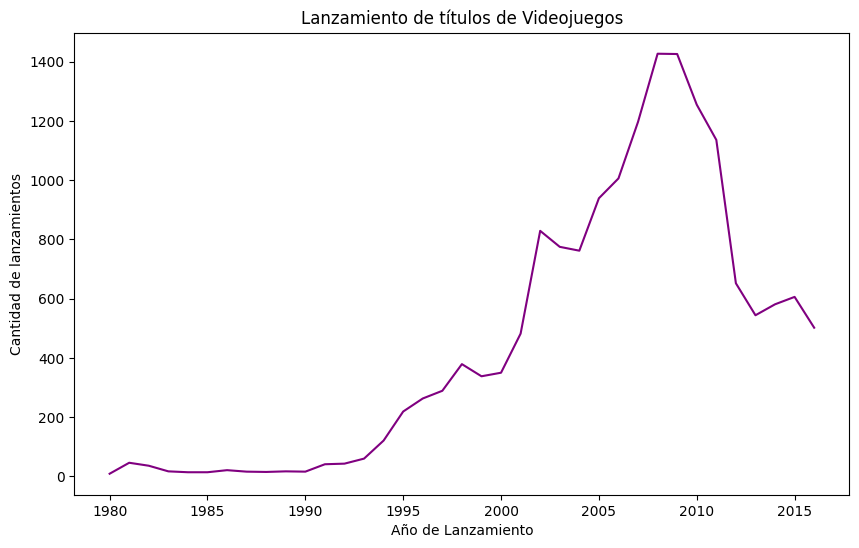

In [25]:
# Visualización de los juegos lanzados por año y su conteo
released_per_year = df_videogames.groupby("year_of_release")["name"].count()
print(released_per_year)
print()
released_per_year.plot(title = "Lanzamiento de títulos de Videojuegos",
                       xlabel = "Año de Lanzamiento", 
                       ylabel= "Cantidad de lanzamientos",
                      figsize = [10,6],
                      color = "purple")
plt.show()

VISUALIZACIÓN GRÁFICA DE VENTAS POR AÑO:


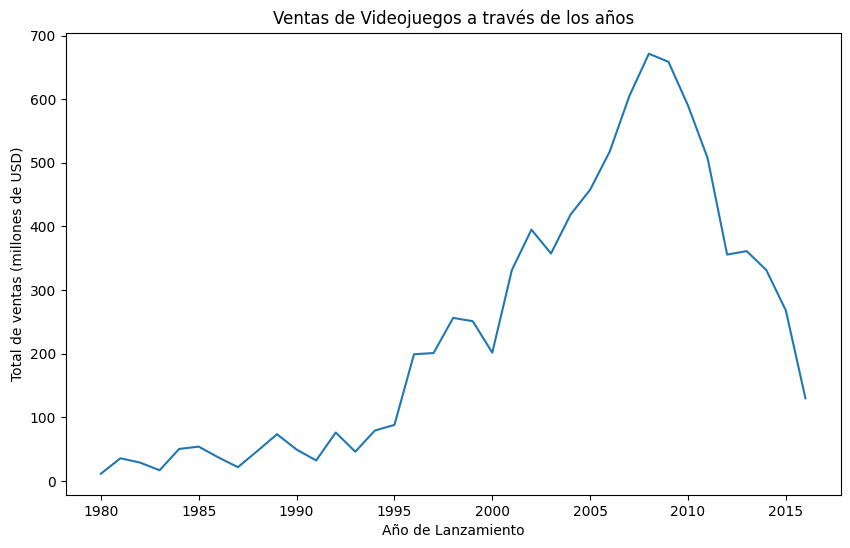

In [26]:
# Visualización de ventas por año (para ampliación de conocimiento de nuestros datos y toma de desiciones con base en valores significativos)
sales_year = df_videogames.groupby("year_of_release")["total_sales"].sum()
print("VISUALIZACIÓN GRÁFICA DE VENTAS POR AÑO:")
sales_year.plot(title = "Ventas de Videojuegos a través de los años",
                       xlabel = "Año de Lanzamiento", 
                       ylabel= "Total de ventas (millones de USD)", 
                       figsize = [10,6])
plt.show()

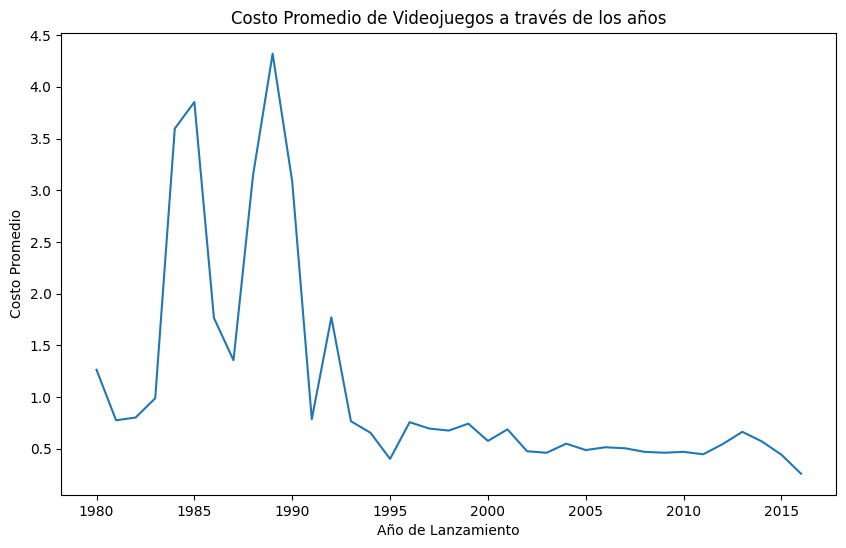

In [27]:
# Visualización de el precio (ticket) promedio (para ampliación de conocimiento de nuestros datos y toma de desiciones)
(sales_year / released_per_year).plot(title = "Costo Promedio de Videojuegos a través de los años",
                                      xlabel = "Año de Lanzamiento", 
                                      ylabel= "Costo Promedio", 
                                     figsize = [10,6])
plt.show()

##### Conclusiones

Al analizar la cantidad de juegos lanzados por año, se observa que algunos periodos cuentan con muy pocos registros, especialmente los años previos a 1994, con un máximo de 60 juegos lanzados en 1993. Estos años podrían no resultan significativos para el análisis estadísticos o comparaciones entre plataformas o géneros.
Los años a partir de 1994 muestran un volumen de datos suficientemente amplio, por lo que pueden considerarse representativos para el análisis.

En el gráfico de costo promedio podemos visualizar que el costo promedio de los videojuegos era muy elevado en los años de 1980 a 1994 en comparación con los años a partir de 1995, donde se aprecia una estabilidad en ticket promedio.

Para evitar conclusiones basadas en muestras pequeñas y considerando la estabilidad de costos a partir de 1995, se decide conservar únicamente los años con valores significativos y estables, donde al parecer, hubo un cambio estructural y tecnológico importante (como la salida y auge de PlayStation por ejemplo). El periodo 1995–2016 se tomará como el conjunto de datos significativo para los análisis posteriores.

In [28]:
# Conservar solo los datos de 1995 en adelante
df_videogames = df_videogames.query("year_of_release >= 1995")

#### 3.2.- Observar cómo es la variación de las ventas de una plataforma a otra. Elegir las plataformas con las mayores ventas totales y construir una distribución basada en los datos de cada año.

In [29]:
# Visualización de ventas totales por plataforma
df_videogames.groupby(["platform", "platform_group"])["total_sales"].count().sort_values(ascending=False)

platform  platform_group
PS2       PlayStation       2127
DS        Nintendo          2120
PS3       PlayStation       1305
Wii       Nintendo          1286
X360      XBox              1232
PSP       PlayStation       1193
PS        PlayStation       1173
PC        PC                 944
GBA       Nintendo           811
XB        XBox               803
GC        Nintendo           542
3DS       Nintendo           512
PSV       PlayStation        429
PS4       PlayStation        392
N64       Nintendo           316
XOne      XBox               247
SAT       Other              154
WiiU      Nintendo           147
SNES      Nintendo            91
GB        Nintendo            64
DC        Other               52
WS        Other                6
NG        Other                6
TG16      Other                2
3DO       Other                2
PCFX      PC                   1
Name: total_sales, dtype: int64

In [30]:
# Top de plataformas con mayores ventas totales
sales_platforms = df_videogames.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
top_platforms = sales_platforms.head(10)
top_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.76
PS       721.55
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

In [31]:
# Filtrar tabla con datos únicamente de las plataformas del top en ventas
df_top_platforms = df_videogames[df_videogames["platform"].isin(top_platforms.index)]
df_top_platforms.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,total_sales
1979,Brink,X360,2011,Shooter,0.59,0.35,0.01,0.09,68.0,58.0,Teens,XBox,1.04
887,Destiny,X360,2014,Shooter,1.31,0.43,0.00,0.18,NaN,47.0,Teens,XBox,1.92
11687,Roll Away,PS,1998,Puzzle,0.04,0.03,0.00,0.00,NaN,NaN,Pending,PlayStation,0.07
14472,Galaxy Angel II: Zettairyouiki no Tobira,PS2,2006,Strategy,0.00,0.00,0.03,0.00,NaN,NaN,Pending,PlayStation,0.03
11877,Colosseum: Road to Freedom,PS2,2005,Role-Playing,0.03,0.03,0.00,0.01,56.0,83.0,Mature,PlayStation,0.07


In [32]:
# Tabla dinámica del total de ventas de las plataformas del top por año 
sales_platform_top = df_top_platforms.pivot_table(index= "year_of_release",
                                          columns = "platform",
                                          values = "total_sales",
                                          aggfunc = "sum")

# Ordenar columnas de plataforma más popular a le menos popular dentro del top
order_columns_sales_platform_top = sales_platform_top.sum().sort_values(ascending=False).index
sales_platform_top_ordered = sales_platform_top[order_columns_sales_platform_top]
sales_platform_top_ordered

platform,PS2,X360,PS3,Wii,DS,PS,PS4,GBA,PSP,3DS
year_of_release,,,,,,,,,,
1995,NaN,NaN,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN
2000,39.17,NaN,NaN,NaN,NaN,96.37,NaN,0.07,NaN,NaN
2001,166.43,NaN,NaN,NaN,NaN,35.59,NaN,61.53,NaN,NaN
2002,205.38,NaN,NaN,NaN,NaN,6.67,NaN,74.16,NaN,NaN
2003,184.31,NaN,NaN,NaN,NaN,2.07,NaN,56.67,NaN,NaN


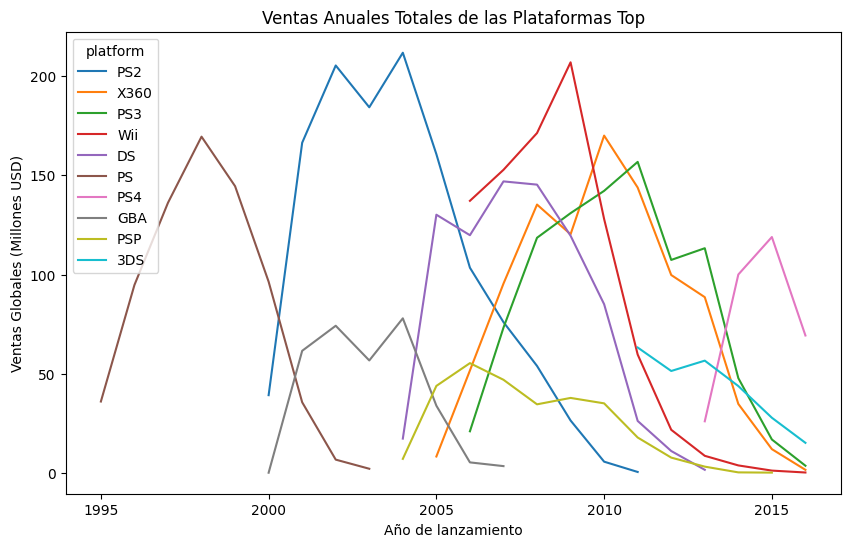

In [33]:
# Visualización de ventas de las plataformas top por año 
sales_platform_top_ordered.plot(kind='line',
                                title = "Ventas Anuales Totales de las Plataformas Top",
                                xlabel = "Año de lanzamiento",
                                ylabel = "Ventas Globales (Millones USD)",
                                figsize = [10,6])
plt.show()

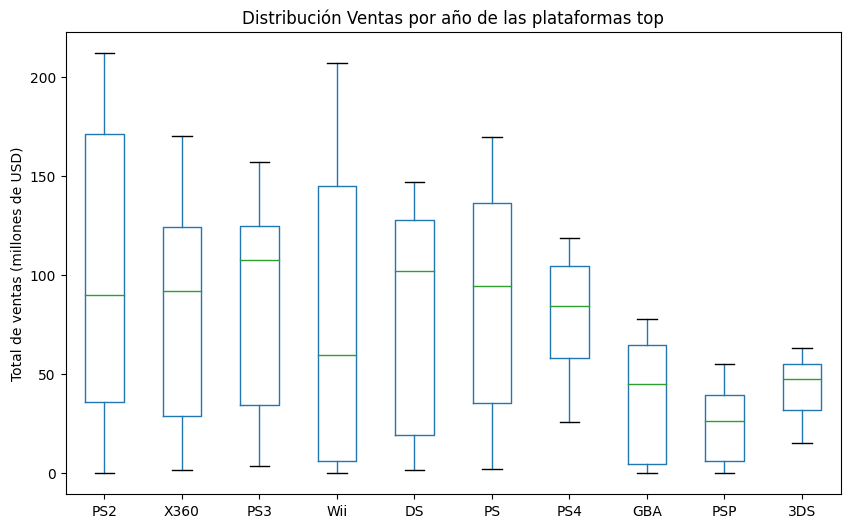

In [34]:
# Distribución del total de ventas de las plataformas top por año 
sales_platform_top_ordered.plot(kind= "box", 
                                title = "Distribución Ventas por año de las plataformas top",
                                ylabel = "Total de ventas (millones de USD)",
                                figsize = [10,6])
plt.show()

##### Conclusiones

Al analizar las ventas totales por plataforma, se observó que las plataformas con mayor volumen de venta histórico pertencen a Playstation, Xbox y Nintendo, siendo PS2, X360, PS3, Wii y DS las 5 plataformas más populares hasta el año 2016 (actual). 

Se consideró utilizar el top 10 de plataformas como muestra para visualizar las distribuciones y realizar análisis futuros.

Al visualizar la distribución anual de ventas del top de plataformas, observamos que PS2 y Wii fueron las plataformas con los picos de ventas más altos. La PS2 presenta las ventas máximas más elevadas del gráfico, además de una gran variabilidad, lo que indica años con ventas extraordinarias. Xbox PS, PS3 y DS también muestran picos altos, lo que las posiciona como plataformas extremadamente populares en su época y sus cajas son más compactas que las de PS2 o Wii, lo que sugiere un rendimiento fuerte, pero más uniforme sin tantos picos extremos.

Las plataformas más modernas como PS4 y 3DS muestran distribuciones más moderadas. PS4 tiene menos dispersión y picos más bajos comparados con generaciones anteriores. Esto puede deberse a que es una consola actual, por lo que hay menos años de datos en el dataset en comparación con plataformas mas antiguas y también a que hay mayor competencia ya que en el mercado a habido una transición digital importante.

Las plataformas GBA y PSP muestran las ventas más bajas (sus rangos son pequeños), esto refleja que fueron plataformas más del tipo nicho

#### 3.3.- Buscar las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [35]:
# Definimos el listado del top (obtenido anteriormente) ordenados de mayor a menor utilizando index.tolist() para poder utilizarlo más adelante en la visualización
top_platforms_order = top_platforms.index.tolist()
top_platforms_order

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [36]:
# Identificar los años en que salió cada plataforma top y su último año de venta, utilizamos reindex() para ordenar el resultado de acuerdo al top
print(df_top_platforms.groupby('platform').agg({"year_of_release": ["min", "max"]}).reindex(top_platforms_order))

# Guardar en nuevas variables
first_year_top = df_top_platforms.groupby("platform")["year_of_release"].min().reindex(top_platforms_order)
last_year_top = df_top_platforms.groupby("platform")["year_of_release"].max().reindex(top_platforms_order)

         year_of_release      
                     min   max
platform                      
PS2                 2000  2011
X360                2005  2016
PS3                 2006  2016
Wii                 2006  2016
DS                  2004  2013
PS                  1995  2003
PS4                 2013  2016
GBA                 2000  2007
PSP                 2004  2015
3DS                 2011  2016


In [37]:
# Identificar las plataformas que solían ser populares, pero que ahora ya no tienen ventas
inactive_top_platforms = last_year_top[last_year_top < (df_top_platforms["year_of_release"].max())] # donde (df_top_platforms["year_of_release"].max() es = 2016
inactive_top_platforms = inactive_top_platforms.index

# Identificar el tiempo que permanecen las plataformas en el mercado
top_platforms_life = last_year_top - first_year_top

# Mostrar el resumen de periodo y total de años que estuvieron presentes en el mercado las plataformas que solían ser populares y que ya no tienen ventas
print("PLATAFORMAS QUE SOLÍAN SER POPULARES QUE YA NO TIENEN VENTAS:")
df_inactive_top_platforms = pd.DataFrame({
    "first_year": first_year_top,
    "last_year": last_year_top,
    "platforms_life": top_platforms_life}).loc[inactive_top_platforms]

df_inactive_top_platforms

PLATAFORMAS QUE SOLÍAN SER POPULARES QUE YA NO TIENEN VENTAS:


,first_year,last_year,platforms_life
platform,,,
PS2,2000,2011,11
DS,2004,2013,9
PS,1995,2003,8
GBA,2000,2007,7
PSP,2004,2015,11


In [38]:
# Determar cuánto tardan generalmente las nuevas plataformas en aparecer y desaparecer a través del valore max, min y la media de "platforms_life"
df_inactive_top_platforms.agg({"platforms_life": ["mean", "median", "min", "max"]})

,platforms_life
mean,9.2
median,9.0
min,7.0
max,11.0


##### Conclusiones

Se detectaron plataformas que fueron populares en su momento pero que actualmente no generan ventas, tales como PS2, DS, PS, GBA y PSP, cuyo último año de actividad fue 2011, 2013, 2003, 2007 y 2015, respectivamente.

Las plataformas de videojuegos que logran ser históricamente populares tardan, en promedio, 9 años en aparecer y desaparecer completamente del mercado de ventas activas. La mayoría de las plataformas populares tienen un ciclo de vida comercial principal que oscila entre los 7 y 11 años.

#### 3.4.- Determinar para qué período se deben tomar datos. Para hacerlo se utilizarán las respuestas a las preguntas anteriores. Los datos deberían permitir construir un modelo para 2017.

Con los análisis anteriores se obtuvieron las siguientes observaciones:

- Antes de 1994, hay muy pocos juegos lanzados por año (menos de 60). Entre 1980 y 1993, el mercado era pequeño y las plataformas desaparecieron por completo (Atari, NES, etc.).

- La industria cambió muchísimo con la llegada de PlayStation, Xbox, Nintendo moderno.

- Las plataformas PS2, X360, PS3 y Wii han sido las más populares históricamente con su aparición en los años 2000, 2005, 2006 y 2006, respectivamente.

- La industria cambia aproximadamente cada 9 años (ciclo promedio de una consola).

Con lo anterior podemos concluir que de acuerdo con los ciclos de vida de las plataformas más populares, los datos previos a 2005 corresponden a consolas que ya no están activas ni guardan relación con las tendencias del mercado de 2017.

Aunque la plataforma más exitosa (PS2) inicia en el año 2000, los años 2000–2004 incluyen consolas ya obsoletas que no aportan información útil para predecir el comportamiento del mercado en 2017.

A partir de 2005 aparecen las plataformas que siguen activas o con influencia directa en 2017 (X360, PS3, Wii, PS4, 3DS). Por lo tanto, para evitar ruido y mantener coherencia temporal, el período más relevante para construir un modelo predictivo para 2017 es 2005–2016. Por lo tanto, el análisis y modelado se realizarán exclusivamente con esos datos.

Se determinó que la estrategia de inversión para 2017: PS4 debe recibir la mayor parte de la inversión, mientras que se debe evitar totalmente invertir en las plataformas que caen a cero (PS3, X360, Wii, DS, PS2).

#### 3.5.- Trabajar solo con los datos relevantes (2005 - 2016)

In [39]:
# Generar DataFrame con valores únicamente de los años de 2005 en adelante
df_games = df_videogames[df_videogames["year_of_release"] >= 2005]
df_games["year_of_release"].min()

2005

#### 3.6.- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [40]:
# Top de plataformas con mayores ventas totales en el periodo de 2005 a 2016
sales_platforms_actual = df_games.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
top_platforms_actual = sales_platforms_actual.head(10)
top_platforms_actual

platform
X360    961.24
PS3     931.33
Wii     891.18
DS      785.49
PS2     426.46
PS4     314.14
PSP     282.47
3DS     257.81
PC      167.79
XOne    159.32
Name: total_sales, dtype: float64

In [41]:
# Filtrar tabla con datos únicamente de las plataformas del top en ventas de 2005 a 2016
df_top_platforms_actual = df_games[df_games["platform"].isin(top_platforms_actual.index)]

sales_platform_top_actual = df_top_platforms_actual.pivot_table(
    index="year_of_release",
    columns="platform",
    values="total_sales",
    aggfunc="sum")

# Ordenar columnas de plataforma más popular a le menos popular dentro del top de 2005 a 2016
order_columns_top = sales_platform_top_actual.sum().sort_values(ascending=False).index
sales_platform_top_ord = sales_platform_top_actual[order_columns_top]
sales_platform_top_ord

platform,X360,PS3,Wii,DS,PS2,PS4,PSP,3DS,PC,XOne
year_of_release,,,,,,,,,,
2005,8.25,NaN,NaN,130.14,160.66,NaN,43.84,NaN,4.37,NaN
2006,51.62,20.96,137.15,119.81,103.42,NaN,55.32,NaN,2.85,NaN
2007,95.41,73.19,152.77,146.94,75.99,NaN,46.93,NaN,9.28,NaN
2008,135.26,118.52,171.32,145.31,53.90,NaN,34.55,NaN,12.42,NaN
2009,120.29,130.93,206.97,119.54,26.40,NaN,37.78,NaN,16.91,NaN
2010,170.03,142.17,127.95,85.02,5.64,NaN,35.04,NaN,24.28,NaN
2011,143.84,156.78,59.65,26.18,0.45,NaN,17.82,63.20,35.03,NaN
2012,99.74,107.35,21.71,11.01,NaN,NaN,7.69,51.36,23.22,NaN
2013,88.58,113.25,8.59,1.54,NaN,25.99,3.14,56.57,12.38,18.96


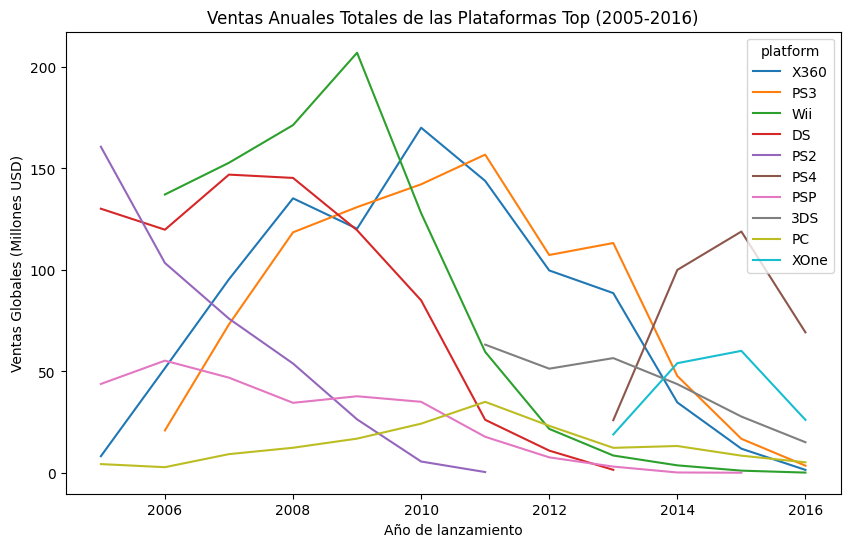

In [42]:
sales_platform_top_ord.plot(kind="line",
                           title = "Ventas Anuales Totales de las Plataformas Top (2005-2016)",
                           xlabel = "Año de lanzamiento",
                           ylabel = "Ventas Globales (Millones USD)",
                           figsize = [10,6])

plt.show()

##### Conclusiones

Con el gráfico de Ventas anuales toales de las plataformas Top (2005-2016) podemos visualizar que PS2 es la plataforma más antigüa. Wii y DS son plataformas que tuvieron pico de ventas y luego cayeron, y X360 y PS3 son plataformas que compitieron entre ellasen la misma generación.

Las plataformas líderes en ventas históricamente en el periodo de 2005-2016 son X360, PS3 y Wii, ya que alcanzaron picos más altos de ventas globales en millones de USD, siendo Wii el que alcanzó el mayor pico por encima de 200 millones de USD alrededor de 2009, pero después de este auge sus ventas calleron en picada. PS3 y X360 son líderes generacionales, que dominaron las ventas durante el periodo de 2007 a 2012, ambas tuvieron picos de ventas anuales cercanos a los 170 millones de USD y en comparativa con Wii sus ventas a lo largo de los años se mantuvieron más estables. De 2014 a 2016 podemos observar un fuerte  y consistente crecimiento de la plataforma PS4, lanzada en 2013, alcanzando ventas anuales más altas de todas las plataformas de su generación (superando los 100 millones de USD en 2015).

Entonces, ¿cuáles crecen y cuáles se reducen?

- Crecimiento: PS4, tiene la tendencia más clara y su valor final en la actualidad (2016) es el más alto del mercado.
- Estable: 3DS muestra una línea relativamente estable en el último periodo (2014-2016) en comparación con las caídas drásticas de otras portátiles (DS y PSP, por ejemplo)
- En declive: XOne, aunque es la nueva generación su línea es inestable y muestra un declive en los últimos años con ventas menores a las de PS4.
- Obsoletas: Wii, DS, PS3, X360, PS2 y PSP; todas estas plataformas tienen líneas que caen a ventas anuales cercanas a cero en 2016, confirmando el fin de su ciclo comercial, esto también coincide con el lanzamiento de las nuevas plataformas generacionales.

La respuesta a nuestra pregunta sobre elegir varias plataformas potencialmente rentables, deberá centrarse en las plataformas que demuestran crecimiento o solidez en 2016.

La plataforma principal en la que hay que centrarse es la PS4 que actualmente (2016) cuenta con mayor rentabilidad, es líder de la actual generación, mostrando el mayor crecimiento y volumen de ventas anuales al cierre de 2016, su ciclo de vida podría aún no haber alcanzado el pico más alto, si consideramos que los datos de 2016 aún están incompletos, lo que sugiere un alto potencial de ventas para 2017. 

La plataforma que podríamos considerar como secundaria es XOne, aunque su crecimiento es más incierto, respresenta la principal competencia de PS4, mas sin embargo, la inversión para esta plataforma debe ser moderada, esperando un repunte de ventas o el lanzamiento de un hit exclusivo para mantenerla en el mercado.

De igual forma, se debería considerar una plataforma nicho, en este caso se considera el portátil 3DS, ya que muestra una base de ventas más estable que otros sistemas obsoletos y podría ser rentable para proyectos que busquen un mercado portátil en 2017.


#### 3.7.- Crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [43]:
# Generar DataFrame únicamente de las plataformas potencialmente rentables
plataformas_rentables = ["PS4", "XOne", "3DS"]
df_rentables = df_games[df_games["platform"].isin(plataformas_rentables)]
df_rentables.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Pending,PlayStation,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Pending,Nintendo,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,82.0,Everyone,Nintendo,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,Mature,PlayStation,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Pending,Nintendo,11.68


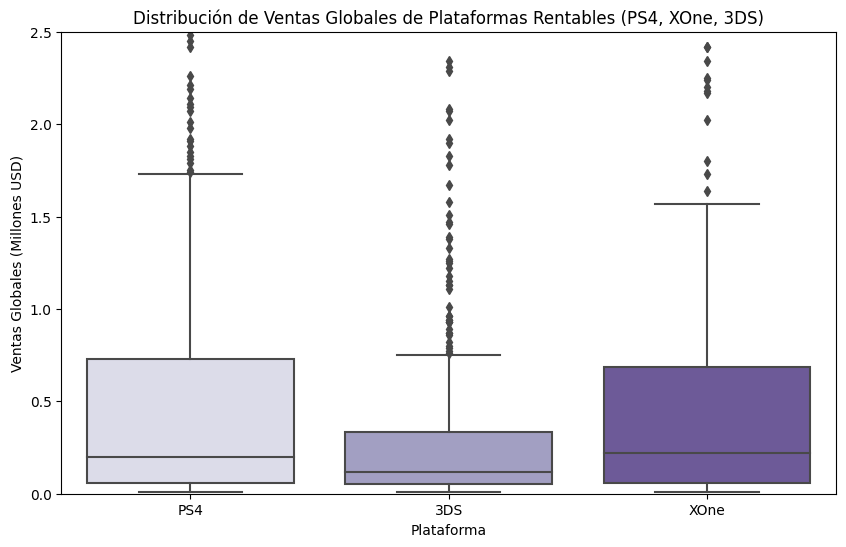

In [44]:
# Generar un diagrama de caja y bigotes de las ventas globales (total_sales) desglosadas por las plataformas rentables (platform)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_rentables, x="platform", y="total_sales", palette="Purples")

plt.ylim(0, 2.5) # Se lmita el eje Y para una mejor visualización del cuerpo de la caja, los valores atípicos se recortarán, pero el cuerpo central será claro.

plt.title(f"Distribución de Ventas Globales de Plataformas Rentables ({', '.join(plataformas_rentables)})")
plt.xlabel("Plataforma")
plt.ylabel("Ventas Globales (Millones USD)")
plt.show()

In [45]:
df_rentables.groupby("platform").agg({"total_sales": ["mean", "median", "var", "std"]}).round(2)

total_sales                   
                mean median   var   std
platform                               
3DS             0.50   0.12  2.08  1.44
PS4             0.80   0.20  2.59  1.61
XOne            0.65   0.22  1.07  1.04

##### Conclusiones

El gráfico muestra la distribución de las ventas globales (en millones de USD) para todos los juegos lanzados en las tres plataformas consideradas como potencialmente rentables para 2017. El eje Y se limitó para mejorar la visualización de la mediana y los cuartiles (el cuerpo de la caja).

Se puede observar que en las tres plataformas, las líneas de las medianas se encuentran muy cerca entre sí y que más del 50% de los juegos en cada plataforma venden menos de 0.2 millones de USD. También notamos que las cajas son bajas y los bigotes son muy largos hacia arriba. Esto confirma que la distribución de ventas en la industria del videojuego está altamente sesgada, la mayoría de juegos vende muy poco, mientras que un pequeño número de hits venden más (límites superior del bigote). Asimismo, Las tres plataformas tienen una gran cantidad de valores atípicos, que llegan muy por encima de los 2.5 millones de USD o más, lo que demuestra la existencia de juegos hit en cada sistema.

¿Son significativas las diferencias en las ventas?

Se observa que las diferencias en la distribución central (mediana y Q1/Q3) entre PS4, XOne y 3DS no son muy significativas, más sin embargo, para PS4 vemos la caja ligeramente más alta que las otras dos, lo que nos indica que tiende a vender una cantidad mayor que las otras plataformas; para 3DS su caja es más baja y más comprimida, por lo que podemos resumir que su juego típico tiene las ventas más bajas de las tres plataformas.

¿Qué sucede con las ventas promedio en varias plataformas? 

Dado que la mediana es extremadamente baja en las tres plataformas podemos concluir que el éxito de cada plataforma depende totalmente de los juegos hit (valores atípicos) que venden más de 1.5 millones de USD. En cuanto a la varianza PS4 y XOne tienen la m,ayo cantidad de valores atípicos, lo que confirma que son las plataformas que generan mayores hits comerciales. 

La media de ventas de cada plataforma claramente es mucho más alta que la mediana debido a la fuerte influencia de los valores atípicos, lo que ocasiona un sesgo en los valores promedio e ven

#### 3.8.- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [46]:
# Filtrar el DataFrame df_rentables para solo la plataforma de PS4, que es la más popular y rentable, sin considerar los NaN de reseñas
df_ps4 = df_rentables[(df_rentables["platform"] == "PS4") & (df_rentables["critic_score"].notna()) & (df_rentables["user_score"].notna())]

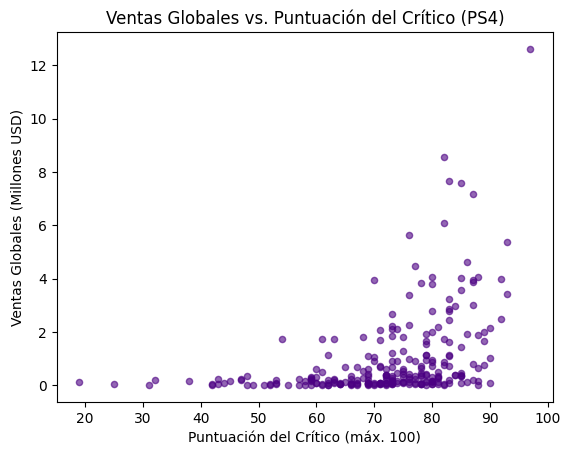

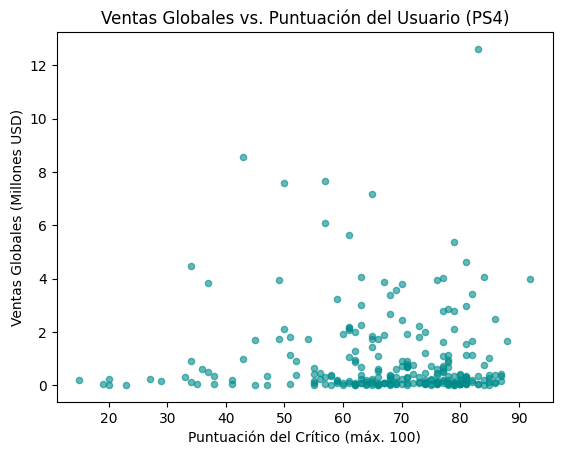

In [47]:
#Generar gráfico de dispersión para Ventas globales vs puntuación del crítico en la plataforma PS4
df_ps4.plot(x='critic_score',
            y='total_sales',
            kind= "scatter",
            title = "Ventas Globales vs. Puntuación del Crítico (PS4)",
            xlabel = "Puntuación del Crítico (máx. 100)",
            ylabel = "Ventas Globales (Millones USD)",
            alpha = 0.6,
            color = "indigo")

#Generar gráfico de dispersión para Ventas globales vs puntuación del usuario en la plataforma PS4
df_ps4.plot(x='user_score',
            y='total_sales',
            kind= "scatter",
            title = "Ventas Globales vs. Puntuación del Usuario (PS4)",
            xlabel = "Puntuación del Crítico (máx. 100)",
            ylabel = "Ventas Globales (Millones USD)",
            alpha = 0.6,
            color = "darkcyan")

plt.show()

In [48]:
# Se determina la correlación entre las reseñas y las ventas
correlation_critic = df_ps4["critic_score"].corr(df_ps4["total_sales"]).round(2)
correlation_user = df_ps4["user_score"].corr(df_ps4["total_sales"]).round(2)

print(f"Correlación (crítico vs. ventas) en PS4: {correlation_critic}")
print(f"Correlación (usuario vs. ventas) en PS4: {correlation_user}")

Correlación (crítico vs. ventas) en PS4: 0.41
Correlación (usuario vs. ventas) en PS4: -0.03


##### Conclusiones

El análisis de correlación y los diagramas de dispersión demuestran que, en la plataforma PS4, las reseñas profesionales (Críticos) tienen una influencia positiva y moderada en las ventas, mientras que las reseñas de usuarios son estadísticamente irrelevantes para predecir el éxito comercial.

Para la correlación (crítico vs ventas) el coeficiente de correlación resultó de 0.406, lo cual indica una correlación positiva moderada. Esto indica que a medida que la puntuación del crítico aumenta, las ventas globales también tienden a aumentar.

Para la correlación (usuario vs ventas) el coeficiente de correlación resultó de -0.034, correclación débil, casi nula por lo que indica que no existe una relación lineal significativa entre la opinión del usuario y las ventas.

#### 3.9.- Comparar las ventas de los mismos juegos en otras plataformas, teniendo en cuenta las conclusiones obtenidas

In [49]:
# Identificar juegos lanzados en PS4 y en XOne
games_ps4 = df_rentables[df_rentables["platform"] == "PS4"][["name"]]
games_xone = df_rentables[df_rentables["platform"] == "XOne"][["name"]]


# Encontrar la intersección (juegos en ambas plataformas), utilizamos merge() con how = "inner" para ello
intersection_games = games_ps4.merge(games_xone, on="name", how="inner")
games_multiplatform = intersection_games["name"]

print(f"Cantidad de juegos multiplataforma (PS4 y XOne): {len(games_multiplatform)}")

# Filtrar el DataFrame para obtener solo esos juegos y esas plataformas
df_multiplatforms = df_rentables[(df_rentables["name"].isin(games_multiplatform)) & (df_rentables["platform"].isin(["PS4", "XOne"]))]
df_multiplatforms

Cantidad de juegos multiplataforma (PS4 y XOne): 217


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Pending,PlayStation,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,Mature,PlayStation,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,43.0,Everyone,PlayStation,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Pending,PlayStation,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,57.0,Mature,PlayStation,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16358,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,82.0,Everyone,XBox,0.01
16371,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,66.0,Everyone,XBox,0.01
16373,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,Pending,XBox,0.01
16388,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,67.0,Pending,XBox,0.01


In [50]:
# Obtención de promedio de ventas multiplataforma
sales_mean_multiplatform = df_multiplatforms.groupby("platform")["total_sales"].mean().round(3)
print("VENTAS PROMEDIO MULTIPLATAFORMA:")
print(sales_mean_multiplatform)

# Calcular la diferencia
diferencial = sales_mean_multiplatform["PS4"] -sales_mean_multiplatform["XOne"]
print(f"\nDIFERENCIAL: {diferencial:.3f} Millones USD")

VENTAS PROMEDIO MULTIPLATAFORMA:
platform
PS4     1.181
XOne    0.596
Name: total_sales, dtype: float64

DIFERENCIAL: 0.585 Millones USD


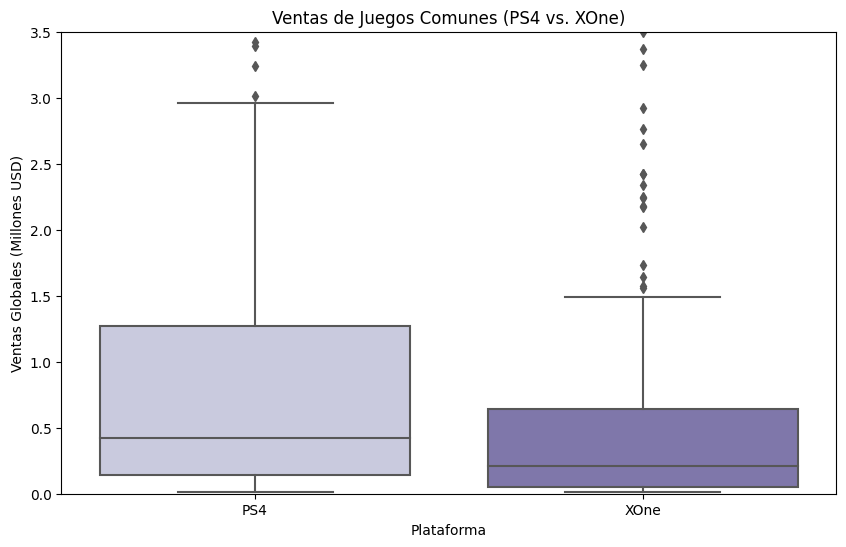

In [51]:
# Gráfico de caja y bigotes para comparativo de juegos multiplataformas (XOne y PS4)
plt.figure(figsize=(10, 6))
sns.boxplot(x="platform", y="total_sales", data=df_multiplatforms, palette="Purples")
plt.title("Ventas de Juegos Comunes (PS4 vs. XOne)")
plt.xlabel("Plataforma")
plt.ylabel("Ventas Globales (Millones USD)")
plt.ylim(0, 3.5) # Se limitó para mejor visualización
plt.show()

##### Conclusiones

Se encontraron 217 videojuegos que se lanzaron para ambas plataformas (para PS4 y XOne). Podemos observar que el ingreso promedio por juego (total_sales) es mayor por 0.585 millones de USD para PS4 (1.18 millones USD) que para XOne (0.596 millones USD), incluso cuando se aíslan los mismos títulos. Esto nos demuestra que la ventaja de PS4 no es solo por su catálogo único, sino por una base de usuarios más grande.

El diagrama de caja nos muestra que la caja de PS4 es más alta que la de XOne, con una mediana de alrededor de 0.4 millones de USD en ventas globales vs la mediana de Xone alrededor de los 2 millones, el bigote superior de PS4 también alcanza valores máximos más altos, alrededor de los 3 millones vs los 1.5 millones de XOne. Con lo anterior podemos visualizar que el juego típico multiplataforma se vende mejor en PS4, y los grandes hits multiplataforma alcanzan sus picos más altos también en esta plataforma.

Podemos concluir que para el modelo 2017, para los juegos multiplataformas, hay un mayor potencial en los juegos para PS4 vs XOne y otras plataformas.

#### 3.10.- Revisar a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [52]:
# Visualización de tablas de ventas totales y ventas promedio por género 
sales_genre = df_rentables.groupby("genre")["total_sales"].sum().sort_values(ascending=False)
sales_genre_mean = df_rentables.groupby("genre")["total_sales"].mean().sort_values(ascending=False)

print("TABLA VENTAS TOTALES POR GÉNERO (2005-2016):")
print(sales_genre)
print()
print("TABLA VENTAS PROMEDIO POR JUEGO Y POR GÉNERO:")
print(sales_genre_mean)

TABLA VENTAS TOTALES POR GÉNERO (2005-2016):
genre
Action          191.25
Shooter         150.11
Role-Playing    123.74
Sports           88.50
Platform         41.15
Racing           36.80
Simulation       28.88
Misc             26.61
Fighting         21.66
Adventure        13.85
Puzzle            5.59
Strategy          3.13
Name: total_sales, dtype: float64

TABLA VENTAS PROMEDIO POR JUEGO Y POR GÉNERO:
genre
Shooter         1.766000
Platform        0.914444
Role-Playing    0.814079
Sports          0.811927
Racing          0.751020
Simulation      0.740513
Fighting        0.555385
Action          0.459736
Misc            0.286129
Puzzle          0.266190
Adventure       0.175316
Strategy        0.130417
Name: total_sales, dtype: float64


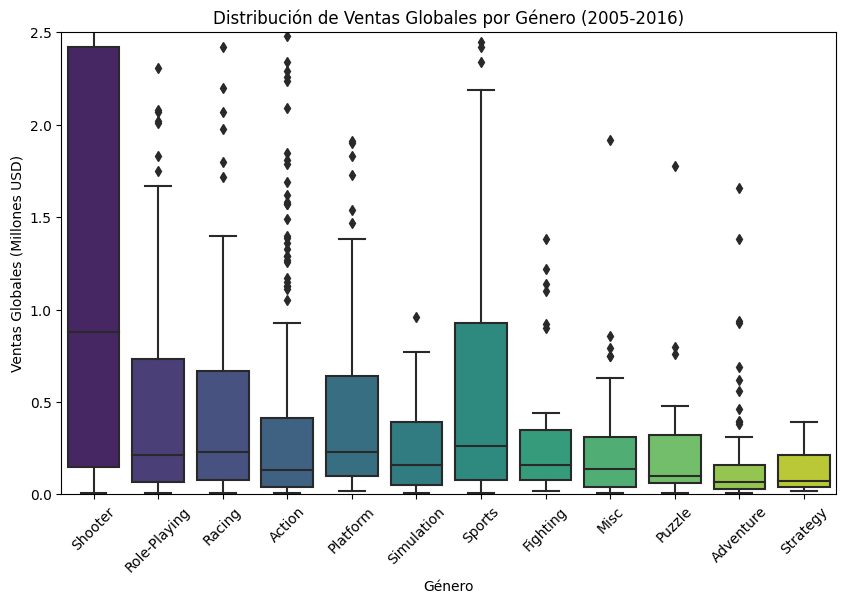

In [53]:
# Gráfico de caja y bigotes de las ventas globales por género
plt.figure(figsize=(10, 6))

sns.boxplot(x="genre", y="total_sales", data=df_rentables, palette="viridis")

plt.ylim(0, 2.5) # se limitó el eje Y para ver el cuerpo de la caja de los juegos típicos
plt.title("Distribución de Ventas Globales por Género (2005-2016)")
plt.xlabel("Género")
plt.ylabel("Ventas Globales (Millones USD)")
plt.xticks(rotation=45)
plt.show()

##### Conclusiones:

La rentabilidad se define por la combinación de ventas totales y ventas promedio. El análisis confirma que la rentabilidad de la industria de los videojuegos se concentra en unos pocos géneros principalmente impulsados por los juegos hit.

Observamos que el género "Action" es el líder en las ventas totales (191.25 millones de USD), esto indica que es el género con mayor cantidad de lanzamientos y clientes. El género "Shooter" tiene el promedio de ventas por juego más alto (1.76 millones de USD), superando en un 200% y más al resto de géneros. Con esto podemos decir que un juego típico de "Shooter" se vende significativamente mejor que un juego típico de otros géneros; por lo que se tiene un mayor potencial de general un juego hit en este género.

El diagrama de caja y bigotes nos muestra que la distribución de ventas para los géneros "Shooter" (mediana de alrededor de 0.9 millones de USD), "Role-Playing" (mediana cerca de los 0.2 millones de USD) y Sports (mediana cerca de los 0.25 millones) son las más altas, estos géneros representan una alta dependencia a unos pocos títulos y/o hits, pero sin ellos podrían tener bajo rendimiento. Para las distribuciones más bajas son para los géneros " Strategy", "aventure" y "Puzzle"; estos juegos tienen muy poca probabilidad de convertirse en un hit, pero las ventas aunque más bajas, son más predecibles.

Podemos concluir que la rentabilidad está basada en generar un hit en los géneros "Shooter", "Role-Playing" y "Action", por lo que para nuestro modelo predictivo de 2017 se debe considerar invertir fuertemente en las franquicias del género "Shooter".


## Paso 4. Crea un perfil de usuario para cada región

#### 4.1.- Para cada región (NA, UE, JP) determinar las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [54]:
# Definir las columnas de ventas regionales
region_cols = ["na_sales", "eu_sales", "jp_sales"]

# Agrupar por plataforma y sumar ventas en cada región
platform_sales_region = df_games.groupby("platform")[region_cols].sum()

In [55]:
# Obtener top 5 de ventas cada región
top5_na = platform_sales_region["na_sales"].sort_values(ascending = False).head()
top5_eu = platform_sales_region["eu_sales"].sort_values(ascending = False).head()
top5_jp = platform_sales_region["jp_sales"].sort_values(ascending = False).head()

print("TOP 5 DE PLATAFORMAS CON MAYORES VENTAS EN NORTEAMÉRICA:")
print(top5_na)
print()
print("TOP 5 DE PLATAFORMAS CON MAYORES VENTAS EN EUROPA:")
print(top5_eu)
print()
print("TOP 5 DE PLATAFORMAS CON MAYORES VENTAS EN JAPÓN:")
print(top5_jp)

TOP 5 DE PLATAFORMAS CON MAYORES VENTAS EN NORTEAMÉRICA:
platform
X360    595.74
Wii     486.87
PS3     390.13
DS      371.98
PS2     200.49
Name: na_sales, dtype: float64

TOP 5 DE PLATAFORMAS CON MAYORES VENTAS EN EUROPA:
platform
PS3     327.20
X360    268.32
Wii     258.32
DS      184.48
PS4     141.09
Name: eu_sales, dtype: float64

TOP 5 DE PLATAFORMAS CON MAYORES VENTAS EN JAPÓN:
platform
DS     171.35
3DS    100.62
PS3     79.41
PSP     73.85
Wii     68.28
Name: jp_sales, dtype: float64


In [56]:
# Unir nombres de plataformas del top 5 de todas las regiones utilizando set
top_platforms_region = set(top5_na.index) | set(top5_eu.index) | set(top5_jp.index)
top_platforms_region

{'3DS', 'DS', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'X360'}

In [57]:
# Filtrar solo las plataformas relevantes para Norteamérica, Europa y Japón
platform_sales_top = platform_sales_region.loc[top_platforms_region]
platform_sales_top

,na_sales,eu_sales,jp_sales
platform,,,
PSP,105.02,63.92,73.85
PS3,390.13,327.20,79.41
PS4,108.74,141.09,15.96
X360,595.74,268.32,12.30
DS,371.98,184.48,171.35
Wii,486.87,258.32,68.28
PS2,200.49,87.14,50.98
3DS,82.65,61.27,100.62


In [58]:
# Obtener el porcentaje que representa las ventas de cada plataforma por cada regió: (Ventas Plataforma/Total de Ventas)*100
platform_sales_pct = platform_sales_top.div(platform_sales_top.sum(axis=0), axis=1) * 100
platform_sales_pct

,na_sales,eu_sales,jp_sales
platform,,,
PSP,4.484929,4.592812,12.893933
PS3,16.660688,23.510138,13.864688
PS4,4.643794,10.137669,2.786556
X360,25.441361,19.279463,2.147534
DS,15.885583,13.255349,29.917067
Wii,20.792016,18.560938,11.921432
PS2,8.562021,6.261227,8.900917
3DS,3.529608,4.402403,17.567874


<Figure size 1000x600 with 0 Axes>

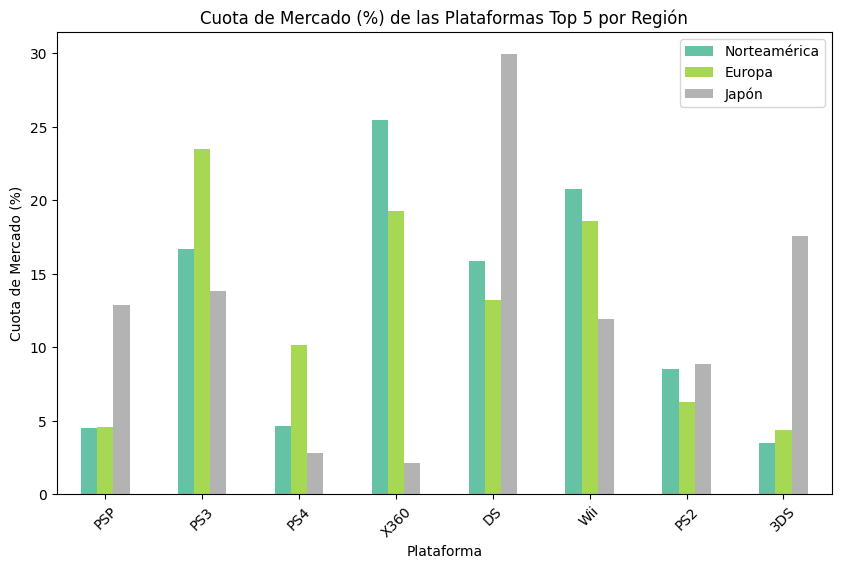

In [59]:
# Graficar las cuotas de mercado para una visualización más clara para poder realizar la comparativa de variaciones en cuota de una región a otra
plt.figure(figsize=(10, 6))

platform_sales_pct.plot(kind="bar", figsize=(10, 6), cmap="Set2")
plt.title("Cuota de Mercado (%) de las Plataformas Top 5 por Región")
plt.ylabel("Cuota de Mercado (%)")
plt.xlabel("Plataforma")
plt.legend(["Norteamérica", "Europa", "Japón"])
plt.xticks(rotation=45)

plt.show()

##### Conclusiones:

A través del gráfico de barras podemos observar las plataformas más fuertes en cada región:

- Se observa que para Norteamérica las 5 plataformas con mayor dominio de cuota de mercado en los años 2005 a 2016 son X360 (25.4%), Wii (20.8), PS3 (16.6%), DS (15.8%) y PS2 (8.5%) en ese órden de prioridad.

- Para Europa las 5 plataformas con mayor dominio de cuota de mercado en los años 2005 a 2016 son PS3 (23.51%), X360(19.3%), Wii (18.6%), DS (13.2%) y PS4 (1.1%)

- Para Japón las 5 plataformas con mayor dominio en los años 2005-2016 son DS (29.9%), 3DS (17.6), PS3 (13.9), PSP (12.9) y Wii (11.9)

Con lo anterior podemos concluir que en el mercado japonés tiene mayor cuota de mercado en las plataformas de Nintendo y luego las de PlayStation y una mínima para Xbox (X360 2.1%), mientras que para Norteamérica las plataformas de mayor cuota de mercado son las de Xbox, seguida de Nintendo y PlayStation; finalemente para Europa las plataformas con mayor cuota de mercado resultaron ser las de PlayStation, seguidas de Xbox y Nintendo.

En cuanto a las plataformas portátiles, podemos observar que tienen una cuota de mercado mucho mayor en Japón que en Norteamérica o Europa, donde el mercado es dominado más fuertemente por las consolas de sobremesa (PS3, X360, Wii).

#### 4.2.- Para cada región (NA, UE, JP) determinar los cinco géneros principales. Explica la diferencia.

In [60]:
# Agrupar ventas por género en cada región
genre_sales_ = df_games.groupby("genre")[["na_sales", "eu_sales", "jp_sales"]].sum()

# Obtener el top 5 de géneros por región
top5_na_genre = genre_sales_["na_sales"].sort_values(ascending=False).head(5)
top5_eu_genre = genre_sales_["eu_sales"].sort_values(ascending=False).head(5)
top5_jp_genre = genre_sales_["jp_sales"].sort_values(ascending=False).head(5)

print("TOP 5 GÉNEROS EN NORTEAMÉRICA:")
print(top5_na_genre)
print()
print("TOP 5 GÉNEROS EN EUROPA:")
print(top5_eu_genre)
print()
print("TOP 5 GÉNEROS EN JAPÓN:")
print(top5_jp_genre)
print()

# Obtener DataFrame de las 3 tablas
top5_genre_table = pd.DataFrame({
    "NA_top5": top5_na_genre.index,
    "EU_top5": top5_eu_genre.index,
    "JP_top5": top5_jp_genre.index
})

print()
top5_genre_table

TOP 5 GÉNEROS EN NORTEAMÉRICA:
genre
Action          580.04
Sports          432.70
Shooter         400.96
Misc            311.82
Role-Playing    211.85
Name: na_sales, dtype: float64

TOP 5 GÉNEROS EN EUROPA:
genre
Action     372.58
Sports     265.60
Shooter    248.07
Misc       167.09
Racing     129.05
Name: eu_sales, dtype: float64

TOP 5 GÉNEROS EN JAPÓN:
genre
Role-Playing    179.60
Action          108.39
Misc             72.49
Sports           52.51
Platform         36.32
Name: jp_sales, dtype: float64




,NA_top5,EU_top5,JP_top5
0,Action,Action,Role-Playing
1,Sports,Sports,Action
2,Shooter,Shooter,Misc
3,Misc,Misc,Sports
4,Role-Playing,Racing,Platform


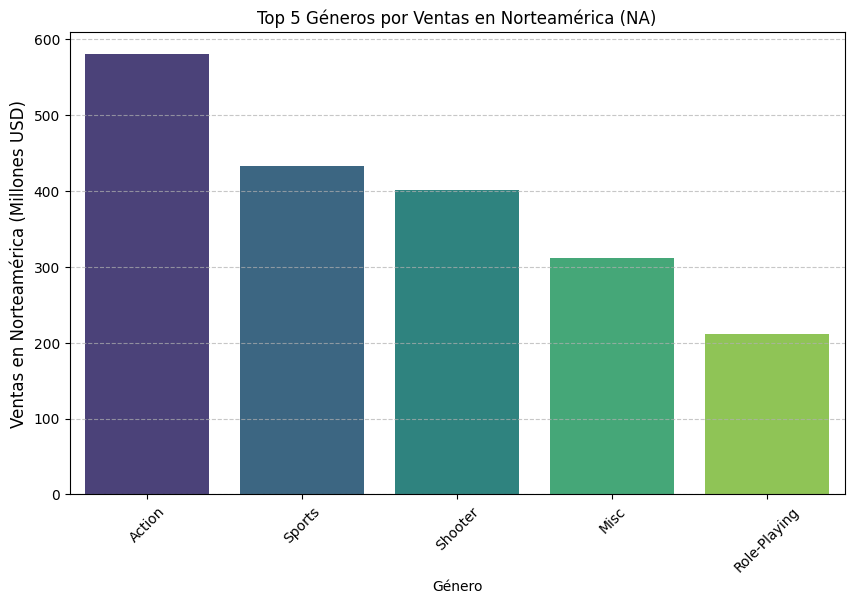

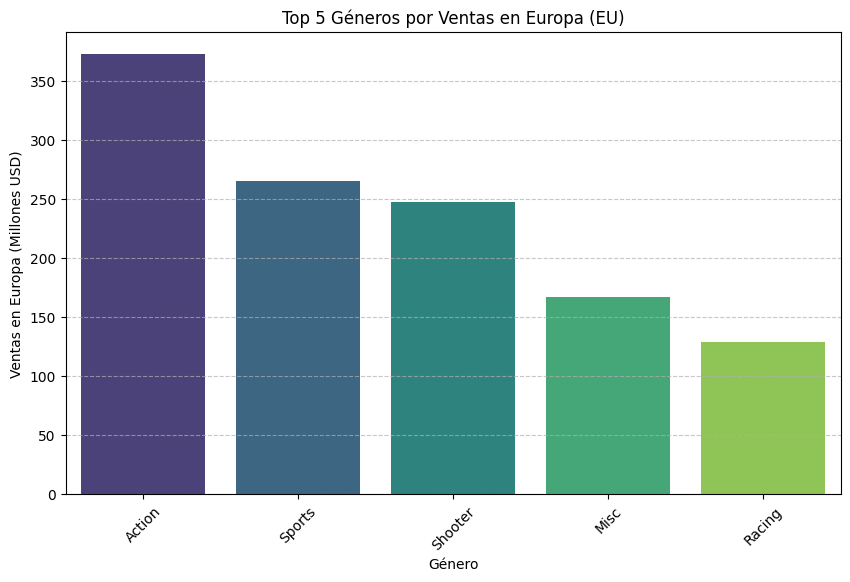

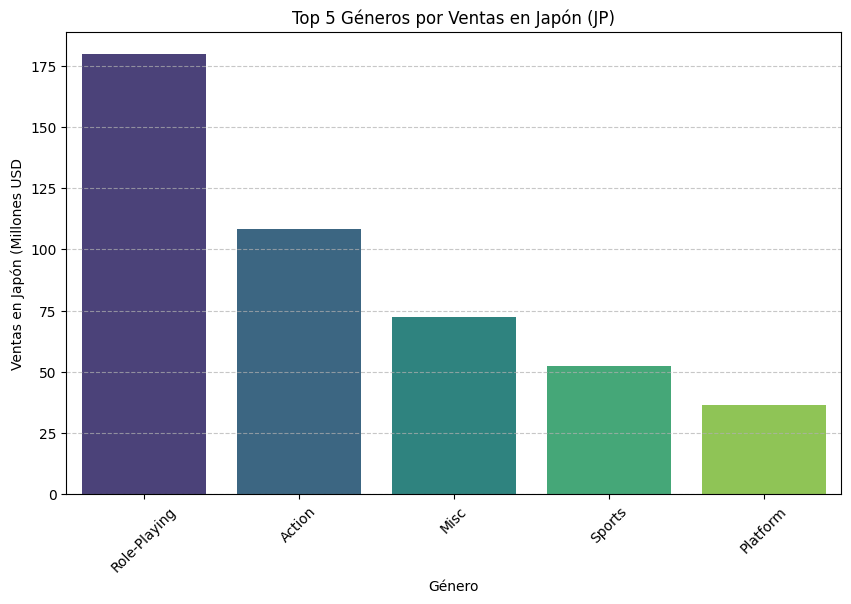

In [61]:
# Generar gráfico de barras del Top 5 de géneros en cada región
plt.figure(figsize=(10,6))
sns.barplot(x=top5_na_genre.index, y=top5_na_genre.values, palette="viridis")

# Configurar el gráfico
plt.title("Top 5 Géneros por Ventas en Norteamérica (NA)")
plt.xlabel("Género")
plt.ylabel("Ventas en Norteamérica (Millones USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=top5_eu_genre.index, y=top5_eu_genre.values, palette="viridis")

# Configurar el gráfico
plt.title("Top 5 Géneros por Ventas en Europa (EU)")
plt.xlabel("Género")
plt.ylabel("Ventas en Europa (Millones USD)")
plt.xticks(rotation=45) 
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=top5_jp_genre.index, y=top5_jp_genre.values, palette="viridis")

# Configurar el gráfico
plt.title("Top 5 Géneros por Ventas en Japón (JP)")
plt.xlabel("Género")
plt.ylabel("Ventas en Japón (Millones USD")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()

##### Conclusiones


Podemos observar en los gráficos que para las regiones de Norteamérica y Europa los géneros dominantes son prácticamente los mismos: "Action", "Sports", "Shooter" y "Misc", con exepción en el género que ocupa el 5to lugar del Top que varía en "Role-Playing" para Norteamérica y "Racing" para Europa. El comportamiento de la distribución es similar para ambas regiones, por lo que podemos concluir que estas regiones prefieren géneros con acción inmediata

Por otro lado, en Japón podemos observar un comportamiento muy distinto del Top en comparación con Norteamérica y Europa, siendo este: "Role-Paying", "Action", "Misc", "Sports" y "Platform". Podemos concluir que Japón tiene gustos muy distintos a los de Norteamericanos y Europeos.

Podemos concluir entonces que las ventas por género muestran diferencias claras entre las regiones. En NA y EU dominan los géneros de acción y deportes, mientras que Japón tiene una preferencia muy marcada por los RPG, géneros narrativos y franquicias locales. Esto demuestra que las preferencias culturales influyen fuertemente en qué géneros son más rentables en cada mercado.


#### 4.3.- Para cada región (NA, UE, JP) determinar las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [62]:
# Sumar ventas por rating ESRB, primero filtrar ratings sin considerar los valores ausentes
df_esrb = df_games[df_games["rating"].notna() & (df_games["rating"] != "Pending")]
esrb_sales = df_esrb.groupby("rating")[["na_sales", "eu_sales", "jp_sales"]].sum()
print(esrb_sales)

                       na_sales  eu_sales  jp_sales
rating                                             
Adults Only                1.26      0.61      0.00
Early Childhood            1.53      0.11      0.00
Everyone                 873.10    508.70    147.33
Everyone from 10 year    343.02    181.92     39.05
Mature                   607.34    414.11     46.23
Teens                    479.08    258.17     91.32


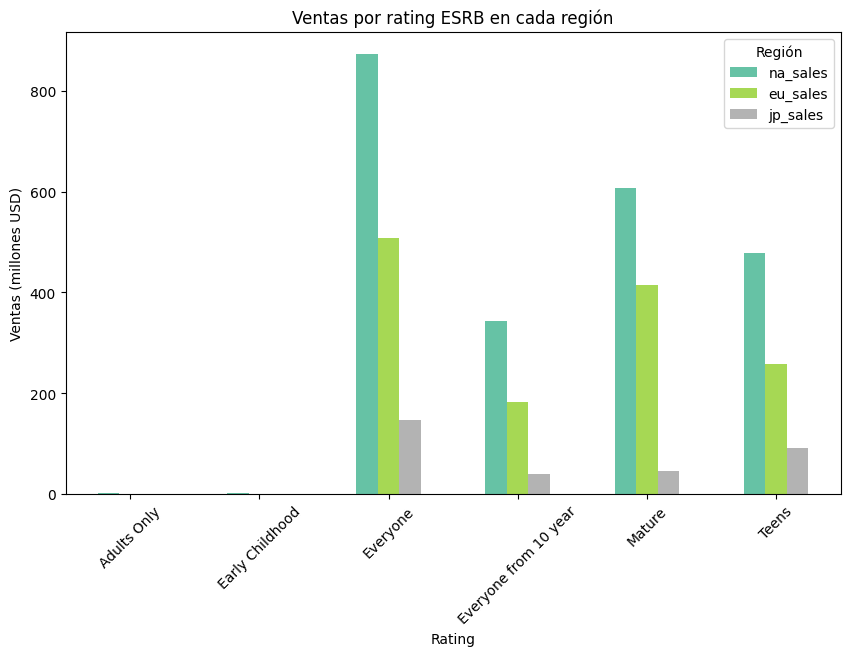

In [63]:
# Generar gráfico de ventas por rating ESRB por región
esrb_sales.plot(kind="bar", figsize=(10,6), cmap="Set2")

plt.title("Ventas por rating ESRB en cada región")
plt.ylabel("Ventas (millones USD)")
plt.xlabel("Rating")
plt.xticks(rotation=45)
plt.legend(title="Región")
plt.show()

##### Conclusiones

Con el gráfico de ventas por rating ESRB en cada región podemos visualizar que hay una clara disparidad cultural y demográfica en los hábitos de compra, especialmente entre Occidente (Norteamérica y Europa) y Japón. Observamos que la gran mayoría de las ventas se concentra en las clasificaciones que cubren a los jugadores jóvenes y adultos (Everyone, Everyone from 10 year, Mature y Teens). El líder general en ventas para todas las regiones es Everyone (E), lo que nos indica la importancio de los juegos para todas las edades; la segunda categoría más importante en NA y EU es Mature (M), reflejando un alto consumo de juegos de acción y disparos para adultos, siendo este rating mínimo para Japón. Finalmente Teens (T) es la segubnda categoría para Japón, mientras que para Occidente ocupa el tercer lugar en ventas.

Concluimos entonces que las clasificaciones ESRB sí afectan las ventas de manera distinta en cada región. En NA y EU las categorías Everyone (E) y Mature (M) concentran gran parte de las ventas, mientras que en Japón las ventas se inclinan fuertemente hacia juegos clasificados como Everyone (E) y Teens (T), con un rechazo notable hacia juegos Mature (M). Esto confirma que la sensibilidad cultural y las preferencias demográficas influyen en qué clasificaciones tienen mayor éxito comercial en cada mercado.

## Paso 5. Prueba de hipótesis

#### 5.1.- Hipótesis I. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

##### Planteamiento de hipótesis

H₀ (hipótesis nula):
Las calificaciones promedio (distribuciones) de los usuarios para Xbox One y PC son iguales.

H₁ (hipótesis alternativa):
Las calificaciones promedio para Xbox One y PC son diferentes.

Se utilizará un nivel de significancia alpha = 0.05

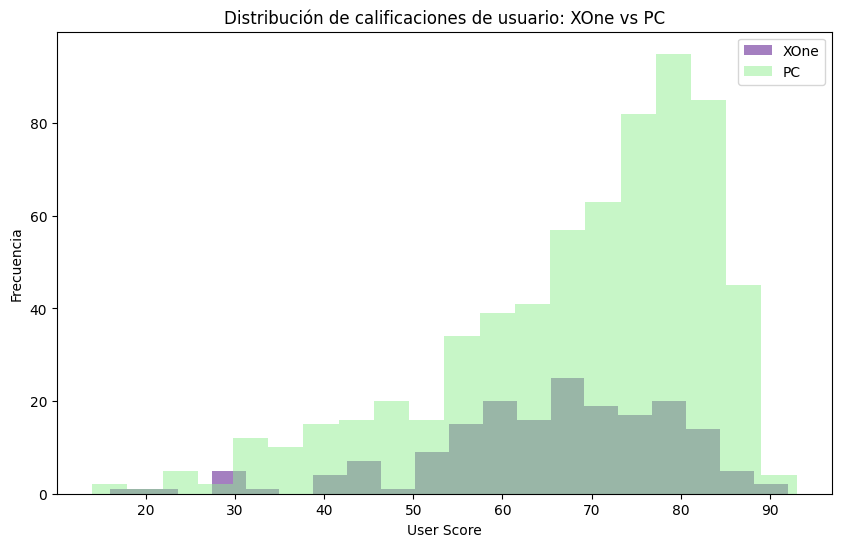

In [64]:
# Revisar comparativas de información estadística y distribuciones para definir qué prueba de hipótesis utilizar

# Filtrar los promedios de calificación de los usuarios por plataforma XOne y PC excluyendo los valores ausentes utilizando dropna()
xone_scores = df_games[df_games["platform"] == "XOne"]["user_score"].dropna()
pc_scores   = df_games[df_games["platform"] == "PC"]["user_score"].dropna()

# Visualizar distribuciones para los user scores de cada plataforma (XOne y PC)
plt.figure(figsize=(10,6))
plt.hist(xone_scores, alpha=0.5, bins=20, label="XOne", color = "indigo")
plt.hist(pc_scores, alpha=0.5, bins=20, label="PC", color = "lightgreen")
plt.xlabel("User Score")
plt.ylabel("Frecuencia")
plt.title("Distribución de calificaciones de usuario: XOne vs PC")
plt.legend()
plt.show()

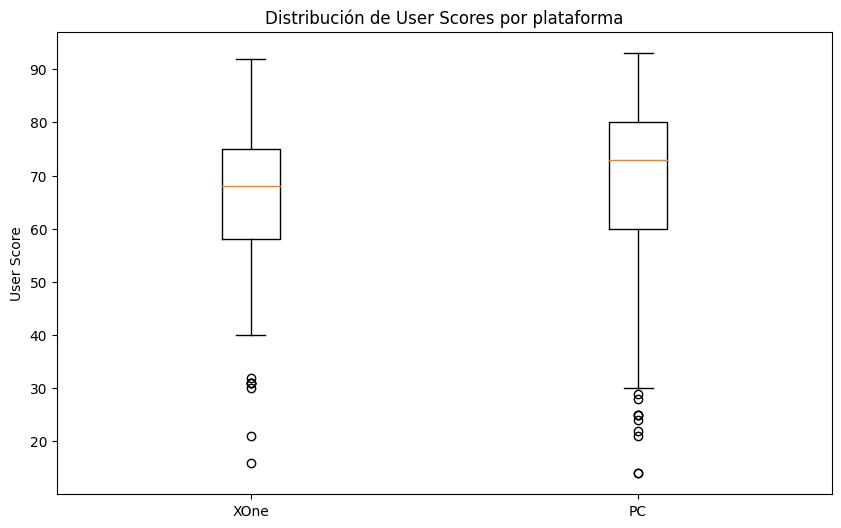

In [65]:
# Visualizar diagrama de caja y bigotes para los user scores de cada plataforma (XOne y PC)
plt.figure(figsize=(10,6))
plt.boxplot([xone_scores, pc_scores], labels=["XOne", "PC"])
plt.ylabel("User Score")
plt.title("Distribución de User Scores por plataforma")
plt.show()

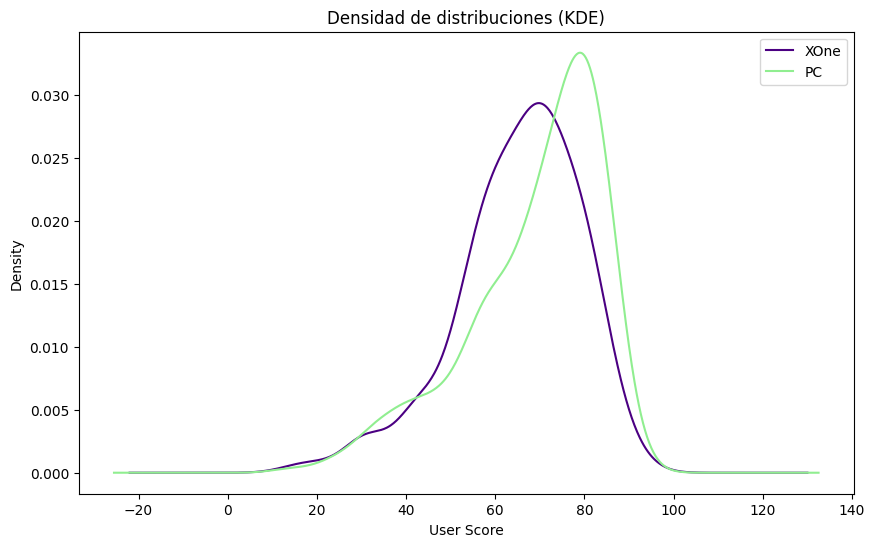

In [66]:
# Visualizar diagrama de densidad de los user scores de cada plataforma (XOne y PC)
plt.figure(figsize=(10,6))
xone_scores.plot(kind="kde", label="XOne", color = "indigo")
pc_scores.plot(kind="kde", label="PC", color = "lightgreen")
plt.title("Densidad de distribuciones (KDE)")
plt.xlabel("User Score")
plt.legend()
plt.show()

In [67]:
# Visualizar los datos estadísticos de los user scores de cada plataforma (XOne y PC)
stats = pd.DataFrame({"XOne": xone_scores.describe(),
                      "PC": pc_scores.describe()})

print(stats)
print()
print(f"Varianza XOne: {xone_scores.var()} / Varianza PC: {pc_scores.var()}")
print()
print(f"Mediana XOne: {xone_scores.median()} / Mediana PC: {pc_scores.median()}")

             XOne          PC
count  182.000000  644.000000
mean    65.214286   68.849379
std     13.809406   15.157667
min     16.000000   14.000000
25%     58.000000   60.000000
50%     68.000000   73.000000
75%     75.000000   80.000000
max     92.000000   93.000000

Varianza XOne: 190.69968429360694 / Varianza PC: 229.75488297286591

Mediana XOne: 68.0 / Mediana PC: 73.0



##### Observaciones y Plan de Acción

El histograma nos muestra que la distribución de PC es más amplia, con mayor dispersión y más valores altos (70–90) que la de XOne. La distribución de XOne es más compacta, con menor varianza. Esto nos sugiere que las varianzas no son iguales. 

El diagrama de caja y bigotes muestra que PC tiene una mediana mayor (73) que XOne (68); PC muestra más outliers inferiores, señal de variabilidad más alta y los rangos intercuartílicos son distintos. Lo que nuevamente sugiere varianzas diferentes y distribuciones no equivalentes.

El diagrama de densidad PC presenta una cola más alargada hacia valores altos lo que nos indica mauyor dispersión que XOne. Las curvas no tienen la misma forma lo que rompe el supuesto de igualdad de varianzas.

El resumen estadístico nos arroja que el tamaño de las muestras son totalmente distintos, 182 para PC y 644 para XOne, esto rompe el supuesto de la prueba t clásica. Confirmamos que las varianzas son totalmente distintas para los user score de estas dos plataformas 190.7 (XOne) vs 229.7 (PC), lo que nos sugiere una vez más la desigualdad que existe. En cuanto a la desviación estándar 13.8 (XOne) vs 15.1 (PC) nos indica que la dispersión entre estas plataformas es distinta.

Por lo anterior, se decidió que para comparar las calificaciones promedio de los usuarios entre Xbox One y PC, se utilizará la prueba t de Welch. Esta elección parece la más adecuada porque los datos muestran diferencias significativas en tamaño de muestra (182 para XOne, 644 para PC) y en varianza (190.70 para XOne vs 229.75 para PC), como también se observa gráficamente en los histogramas, boxplots y curvas KDE. Debido a que la prueba t clásica asume igualdad de varianzas y tamaños similares, estos supuestos no se cumplen en el presente análisis. La prueba t de Welch, en cambio, no requiere igualdad de varianzas y se ajusta mejor a distribuciones con tamaños diferentes y dispersión desigual; de igual forma esta prueba nos funciona  si las variables son numéricas, las muestras son independientes y los tamaños de muestras son mayores a 30, esta prueba nos proporcionará una comparación más robusta entre las medias de ambas plataformas.


##### Prueba de Hipótesis

In [68]:
# Planteamiento de hipótesis I
print("H₀ (hipótesis nula): Las calificaciones promedio (distribuciones) de los usuarios para Xbox One y PC son iguales.")
print()
print("H₁ (hipótesis alternativa): Las calificaciones promedio para Xbox One y PC son diferentes.")
print()

# Se establece alpha en 5%, si el valor de p (probabilidad) es menor que este porcentaje se rechazará la hipótesis nula y se concluirá que Las calificaciones promedio son diferentes
alpha = 0.05

# Ejecutar prueba t de Welch con equal_var=False ya que se asume desigualdad de varianzas
results1 = st.ttest_ind(xone_scores, pc_scores, equal_var=False)

print("Valor p:", results1.pvalue)
print()

# Se realiza el comparativo del valor p con el umbral del 5% y se valida o descarta la hipòtesis nula, lo realizaremos con condicinales
if results1.pvalue < alpha:
    print("Resultado: Rechazamos la hipótesis nula, se concluye que Las calificaciones medias de los usuarios para XOne y PC son significativamente diferentes.")
else:
    print("Resultado: No podemos rechazar la hipótesis nula, por lo que no hay evidencia que Las calificaciones medias de los usuarios para XOne y PC son significativamente diferentes")

H₀ (hipótesis nula): Las calificaciones promedio (distribuciones) de los usuarios para Xbox One y PC son iguales.

H₁ (hipótesis alternativa): Las calificaciones promedio para Xbox One y PC son diferentes.

Valor p: 0.0023480155359562526

Resultado: Rechazamos la hipótesis nula, se concluye que Las calificaciones medias de los usuarios para XOne y PC son significativamente diferentes.


##### Conclusiones


Se definió la hipótesis nula y alternativa basándonos en el hecho de que en estadística siempre se formula la hipótesis nula (H₀) como igualdad y la hipótesis alternativa (H₁) como diferencia. Por ello se definió: H₀ (hipótesis nula) - Las calificaciones promedio (distribuciones) de los usuarios para XOne y PC son iguales y H₁ (hipótesis alternativa) - Las calificaciones promedio de los usuarios para XOne y PC son iguales; siguiendo la estructura estándar de pruebas de hipótesis. Se estableció un umbral del 5% dado que es el estándar estadístico habitual que ofrece un balance adecuado entre rigor y sensibilidad para detectar diferencias reales.

Se utiizó para comparar las calificaciones promedio de los usuarios entre Xbox One y PC la prueba t de Welch. Esta elección fue la más adecuada porque los datos mostraron diferencias significativas en tamaño de muestra (182 para XOne, 644 para PC) y en varianza (190.70 para XOne vs 229.75 para PC), como también se observó gráficamente en los histogramas, boxplots y curvas KDE; además que las muestras eran independientes, tenían tamaños diferentes de distrubuciones y dispersión desigual.

La prueba de t de Welch nos arrojó un valor de proabilidad (p) de 0.0023 y se comparó con el umbral de significancia alpha del 5%, por lo que se rechaza la hipótesis nula y se concluyes que las calificaciones promedio de los usuarios para XOne y PC son estadísticamente diferentes.


#### 5.2.- Hipótesis II. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

##### Planteamiento de hipótesis

H₀ (hipótesis nula):
Las calificaciones promedio (distribuciones) de los usuarios para los géneros de Acción y Deportes son iguales.

H₁ (hipótesis alternativa):
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Se utilizará un nivel de significancia alpha = 0.05

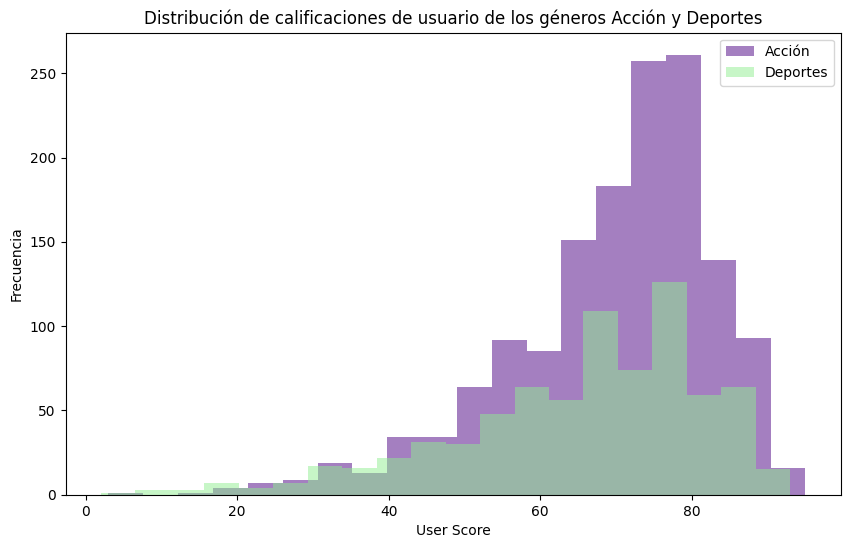

In [69]:
# Revisar comparativas de información estadística y distribuciones para definir qué prueba de hipótesis utilizar

# Filtrar los promedios de calificación de los usuarios por género "Action" y "Sports" excluyendo los valores ausentes utilizando dropna()
action_scores = df_games[df_games["genre"] == "Action"]["user_score"].dropna()
sports_scores  = df_games[df_games["genre"] == "Sports"]["user_score"].dropna()

# Visualizar distribuciones para los user scores de cada género ("Action" y "Sports")
plt.figure(figsize=(10,6))
plt.hist(action_scores, alpha=0.5, bins=20, label="Acción", color = "indigo")
plt.hist(sports_scores, alpha=0.5, bins=20, label="Deportes", color = "lightgreen")
plt.xlabel("User Score")
plt.ylabel("Frecuencia")
plt.title("Distribución de calificaciones de usuario de los géneros Acción y Deportes")
plt.legend()
plt.show()

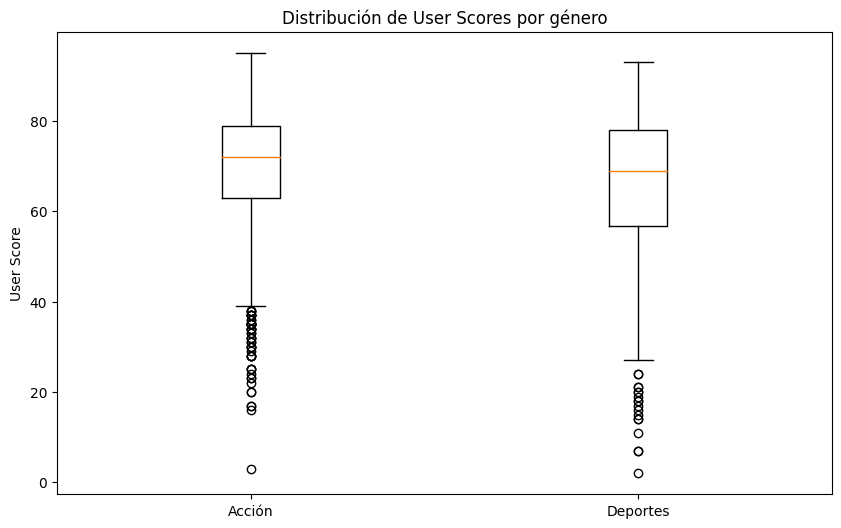

In [70]:
# Visualizar diagrama de caja y bigotes para los user scores de cada género ("Action" y "Sports")
plt.figure(figsize=(10,6))
plt.boxplot([action_scores, sports_scores], labels=["Acción", "Deportes"])
plt.ylabel("User Score")
plt.title("Distribución de User Scores por género")
plt.show()

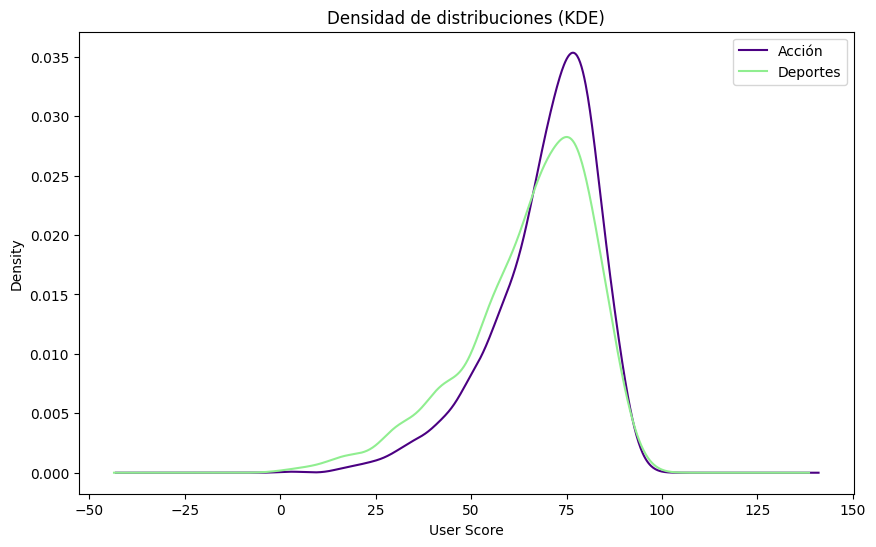

In [71]:
# Visualizar diagrama de densidad de los user scores de cada género ("Acción" y "Deportes")
plt.figure(figsize=(10,6))
action_scores.plot(kind="kde", label="Acción", color = "indigo")
sports_scores.plot(kind="kde", label="Deportes", color = "lightgreen")
plt.title("Densidad de distribuciones (KDE)")
plt.xlabel("User Score")
plt.legend()
plt.show()

In [72]:
# Visualizar los datos estadísticos de los user scores de cada género ("Action" y "Sports")
stats_genre = pd.DataFrame({"Acción": action_scores.describe(),
                      "Deportes": sports_scores.describe()})

print(stats_genre)
print()
print(f"Varianza Acción: {action_scores.var()} / Varianza Deportes: {sports_scores.var()}")
print()
print(f"Mediana Acción: {action_scores.median()} / Mediana Deportes: {sports_scores.median()}")

            Acción    Deportes
count  1463.000000  756.000000
mean     69.470267   65.408730
std      13.669002   16.406294
min       3.000000    2.000000
25%      63.000000   56.750000
50%      72.000000   69.000000
75%      79.000000   78.000000
max      95.000000   93.000000

Varianza Acción: 186.84162557868365 / Varianza Deportes: 269.1664932198045

Mediana Acción: 72.0 / Mediana Deportes: 69.0


##### Observaciones y Plan de Acción

El histograma nos muestra que la distribución del género de Acción es más amplia, con mayor dispersión y más valores altos (250) que la de Deportes. La distribución de "Action" es más compacta, con menor varianza. Esto nos sugiere que las varianzas no son iguales. 

El diagrama de caja y bigotes muestra que "Action" tiene una mediana mayor (72) que "Deportes" (69); Acción muestra más outliers inferiores, señal de variabilidad más alta y los rangos intercuartílicos son distintos. Lo que nuevamente sugiere varianzas diferentes y distribuciones no equivalentes.

El diagrama de densidad de Deportes presenta una cola más alargada hacia valores altos lo que nos indica mauyor dispersión que el género de Acción. 

El resumen estadístico nos arroja que el tamaño de las muestras son totalmente distintos, 1463 para el género de Acción y 756 para el de Deportes, esto rompe el supuesto de la prueba t clásica. Confirmamos que las varianzas son totalmente distintas para los user score de estas dos plataformas 186.8 (Acción) vs 269.2 (Deportes), lo que nos sugiere una vez más la desigualdad que existe. En cuanto a la desviación estándar 13.6 (Acción) vs 16.4 (Deportes) nos indica que la dispersión entre estas plataformas es distinta.

Por lo anterior, se decidió que para comparar las calificaciones promedio de los usuarios entre los géneros Acción y Deportes, se utilizará la prueba t de Welch. Esta elección parece la más adecuada porque los datos muestran diferencias significativas en tamaño de muestra (1463 para el género de Acción, 756 para el de Deportes) y en varianza (186.8 para el género de Acción vs 269.2 para Deportes), como también se observa gráficamente en los histogramas, boxplots y curvas KDE. Debido a que la prueba t clásica asume igualdad de varianzas y tamaños similares, estos supuestos no se cumplen en el presente análisis. La prueba t de Welch, en cambio, no requiere igualdad de varianzas y se ajusta mejor a distribuciones con tamaños diferentes y dispersión desigual; de igual forma esta prueba nos funciona si las variables son numéricas, las muestras son independientes y los tamaños de muestras son mayores a 30, esta prueba nos proporcionará una comparación más robusta entre las medias de ambas plataformas.

##### Prueba de Hipótesis

In [73]:
# Planteamiento de hipótesis II
print("H₀ (hipótesis nula): Las calificaciones promedio (distribuciones) de los usuarios para los géneros de Acción y Deportes son iguales.")
print()
print("H₁ (hipótesis alternativa): Las calificaciones promedio para los géneros de Acción y Deportes son diferentes.")
print()

# Se establece alpha en 5%, si el valor de p (probabilidad) es menor que este porcentaje se rechazará la hipótesis nula y se concluirá que Las calificaciones promedio son diferentes
alpha2 = 0.05

# Ejecutar prueba t de Welch con equal_var=False ya que se asume desigualdad de varianzas
results2 = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print("Valor p:", results2.pvalue)
print()

# Se realiza el comparativo del valor p con el umbral del 5% y se valida o descarta la hipòtesis nula, lo realizaremos con condicinales
if results2.pvalue < alpha2:
    print("Resultado: Rechazamos la hipótesis nula, se concluye que Las calificaciones medias de los usuarios para los géneros de Acción y Deportes son significativamente diferentes.")
else:
    print("Resultado: No podemos rechazar la hipótesis nula, no hay evidencia significativa que Las calificaciones medias de los usuarios de géneros Acción y Deportes son diferentes")

H₀ (hipótesis nula): Las calificaciones promedio (distribuciones) de los usuarios para los géneros de Acción y Deportes son iguales.

H₁ (hipótesis alternativa): Las calificaciones promedio para los géneros de Acción y Deportes son diferentes.

Valor p: 6.596884028358811e-09

Resultado: Rechazamos la hipótesis nula, se concluye que Las calificaciones medias de los usuarios para los géneros de Acción y Deportes son significativamente diferentes.


##### Conclusiones

Se definió la hipótesis nula y alternativa basándonos en el hecho de que en estadística siempre se formula la hipótesis nula (H₀) como igualdad y la hipótesis alternativa (H₁) como diferencia. Por ello se definió: H₀ (hipótesis nula) - Las calificaciones promedio (distribuciones) de los usuarios para los géneros de Acción y Deportes son diferentes y H₁ (hipótesis alternativa) - Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales; siguiendo la estructura estándar de pruebas de hipótesis. Se estableció un umbral del 5% dado que es el estándar estadístico habitual que ofrece un balance adecuado entre rigor y sensibilidad para detectar diferencias reales.

Se utiizó para comparar las calificaciones promedio de los usuarios entre los géneros Acción y Deportes la prueba t de Welch. Esta elección fue la más adecuada porque los datos mostraron diferencias significativas en tamaño de muestra (1463 para Acción, 756 para Deportes) y en varianza (186.8 para Acción vs 269.2 para Deportes), como también se observó gráficamente en los histogramas, boxplots y curvas KDE; además que las muestras eran independientes, tenían tamaños diferentes de distrubuciones y dispersión desigual.

La prueba de t de Welch nos arrojó un valor de proabilidad (p) de 6.596884028358811e-09 y se comparó con el umbral de significancia alpha del 5%, por lo que se rechaza la hipótesis nula y se concluye que las calificaciones promedio de los usuarios para los géneros Acción y Deportes son estadísticamente diferentes.

# Paso 6. Conclusión General

***Preparación y limpieza de los datos***

El conjunto de datos fue depurado y estandarizado para garantizar su calidad y consistencia. Se normalizaron nombres de columnas, se eliminaron duplicados (271 filas, equivalentes al 1.6% del total), se reemplazaron los valores “TBD” de user_score por nulos y se corrigió su tipo de datos a float. También se reorganizaron categorías de la columna rating y se añadieron nuevas variables relevantes para el análisis, como platform_group y total_sales.
Este proceso permitió construir una base sólida, coherente y adecuada para el análisis estadístico y la modelación posterior.

***Análisis exploratorio de datos (EDA)***

Los registros anteriores a 1994 mostraron cantidades muy pequeñas de juegos por año (menos de 60) y comportamientos poco representativos, por lo que se descartaron. Se mantuvo el periodo 1995–2016, que contiene datos completos y consistentes.

- El análisis de plataformas reveló patrones importantes:

- Consolas como PS2, Wii y Xbox presentaron ciclos de vida largos, con altos volúmenes y gran variabilidad en ventas.

- Plataformas como GBA, PSP y 3DS mostraron ciclos cortos y menor volumen global.

- En promedio, una consola popular mantiene un ciclo comercial cercano a 9 años, desde su lanzamiento hasta su desaparición del mercado.

Con base en esto, para construir un modelo enfocado en 2017, se seleccionó el periodo 2005–2016, que refleja el comportamiento moderno del mercado y concentra las plataformas aún activas o influyentes durante ese año.

***Comparación entre plataformas***

- Las ventas típicas muestran diferencias moderadas entre consolas:

- PS4 posee la mediana más alta y una mayor concentración de “hits”.

- XOne se comporta similar, aunque con menor rendimiento promedio.

- 3DS presenta las ventas más bajas y un alcance más limitado.

- Entre los 217 juegos lanzados tanto en PS4 como en XOne:

- PS4 tuvo un ingreso promedio por título de 1.18 millones USD,

- XOne tuvo 0.596 millones USD, una diferencia de 0.585 millones, confirmando una ventaja comercial clara.

Esto indica que en el modelo para 2017, PS4 debe recibir un mayor peso como plataforma debido a su mayor potencial de ventas.

***Análisis de géneros***

El género Action lidera en ventas totales (191.25 millones USD) y es el más popular por volumen.

El género Shooter destaca por tener el promedio de ventas más alto por juego (1.76 millones USD), superando en más del 200% a otros géneros, lo que lo convierte en el más propenso a generar hits.

Los diagramas de caja mostraron:

Ventas más altas: Shooter, Role-Playing, Sports.

Ventas más bajas pero más estables: Strategy, Adventure, Puzzle.

Esto indica que la rentabilidad del mercado depende de pocos títulos de alto impacto, en especial en Shooter, Role-Playing y Action.

- Preferencias por región (NA, EU, JP)

Las diferencias regionales fueron claras:

 *NA y EU*

- Top géneros: Action, Sports, Shooter, Misc.

- Solo el quinto lugar cambia: Role-Playing en NA y Racing en EU.

- Comportamiento similar → preferencia por géneros de acción directa.

 *JP*

- Top géneros: Role-Playing, Action, Misc, Sports, Platform.

- Preferencias totalmente distintas, con fuerte inclinación por RPGs.

Las preferencias culturales influyen fuertemente en qué géneros dominan cada mercado.

***Impacto de ESRB por región***

Las clasificaciones ESRB afectan las ventas de forma desigual:

- NA y EU: mayor éxito en categorías E y M.

- JP: preferencia por E y T, con ventas bajas en M.

- Esto demuestra diferencias culturales y demográficas en la recepción del contenido.

- Pruebas de hipótesis

***Hipótesis I – Xbox One vs PC***

H₀: Las calificaciones promedio de usuario son iguales.

H₁: Las calificaciones promedio de usuario son diferentes.

Nivel de significancia: alpha = 0.05 (estándar estadístico).

Se utilizó la prueba t de Welch debido a:

- Diferencias en tamaño de muestra (182 vs 644).

- Diferencias de varianza (190.70 vs 229.75).

- Distribuciones independientes y heterogéneas.

Resultado: p = 0.0023 < 0.05, por lo que se rechaza H₀ →
Las calificaciones promedio entre XOne y PC son estadísticamente diferentes.

***Hipótesis II – Acción vs Deportes***

H₀: Las calificaciones promedio son iguales.

H₁: Las calificaciones promedio son diferentes.

Nivel de significancia: alpha = 0.05.

También se utilizó t de Welch debido a:

- Tamaños diferentes (1463 vs 756).

- Varianzas heterogéneas (186.8 vs 269.2).

- Diferencias observadas en histogramas, boxplots y KDE.

Resultado: p = 6.59e-09 < 0.05, por lo que se rechaza H₀ →
Las calificaciones promedio entre Acción y Deportes son significativamente diferentes.

### Conclusión Final

El análisis integral del mercado de videojuegos entre 2005 y 2016 permitió identificar patrones claros y consistentes. PS4 y XOne se consolidaron como las plataformas más rentables para el modelo de 2017, con PS4 manteniendo ventaja tanto en catálogo como en desempeño por título. Los géneros Shooter, Action y Role-Playing demostraron el mayor potencial de generar ventas altas, aunque su éxito depende fuertemente de títulos extraordinarios.

Las diferencias regionales en preferencias y en la respuesta a las clasificaciones ESRB refuerzan la importancia de segmentar estrategias por mercado. Finalmente, las pruebas de hipótesis confirmaron diferencias reales en la percepción de los usuarios según plataforma y género, proporcionando bases estadísticas sólidas para modelar y predecir ventas futuras.